# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import pyqtgraph
print(pyqtgraph.__file__)
import neuroanalysis
print(neuroanalysis.__file__)
import neuroanalysis.util
import aisynphys
import aisynphys.database
print(aisynphys.__file__)

from IPython.display import display, Markdown

c:\Users\Silje\miniconda3\envs\aisynphys39\lib\site-packages\pyqtgraph\__init__.py
C:\Users\Silje\neuroanalysis\neuroanalysis\__init__.py
C:\Users\Silje\aisynphys\aisynphys\__init__.py


Note to self: To get this working, I have:
* Downloaded aisynphys source code
* Downloaded neuroanalysis source code
* Set up environment in anaconda, with python 3.9:

```powershell
# clone repo aisynphys
# change to python 3.9 in yaml
mamba create -n aisynphys39 python=3.9
conda activate aisynphys39
mamba install numpy scipy pandas matplotlib sqlalchemy pyqt pyqtgraph numba h5py -c conda-forge
pip install lmfit
cd C:\Users\myuser\src\aisynphys
python setup.py develop
# cd to user
git clone https://github.com/alleninstitute/neuroanalysis
cd C:\Users\myuser\neuroanalysis
python setup.py develop
# Then was a problem with missing pyyaml, so downloaded that
mamba install -c conda-forge pyyaml
```

In [2]:
from aisynphys.database import SynphysDatabase # https://aisynphys.readthedocs.io/en/current-release/database_access.html#database-access
from pathlib import Path

# Define cache directory
CACHE_PATH = Path("data/aisynphys/cache").resolve()

# Create a cache directory if it does not exist
CACHE_PATH.mkdir(parents=True, exist_ok=True)

# Tell AISynPhys to use this cache
aisynphys.config.cache_path = CACHE_PATH
# SynphysDatabase.set_cache_path(CACHE_PATH)


# Make cache
DATA_ROOT = Path("data/aisynphys/cache")

# Inspect available database versions
SynphysDatabase.list_versions()  # List all available versions

# Load small database -- Uncomment to load
# DB_VERSION = 'synphys_r2.1_medium.sqlite'
# db = SynphysDatabase.load_version(DB_VERSION)

[{'db_file': 'synphys_r1.0_2019-08-29_small.sqlite',
  'url': 'https://allen-synphys.s3-us-west-2.amazonaws.com/synphys_r1.0_small.sqlite',
  'schema_version': '15',
  'release_version': '1.0',
  'db_size': 'small'},
 {'db_file': 'synphys_r1.0_small.sqlite',
  'url': 'https://allen-synphys.s3-us-west-2.amazonaws.com/synphys_r1.0_small.sqlite',
  'schema_version': '15',
  'release_version': '1.0',
  'db_size': 'small'},
 {'db_file': 'synphys_r1.0_2019-08-29_medium.sqlite',
  'url': 'https://allen-synphys.s3-us-west-2.amazonaws.com/synphys_r1.0_medium.sqlite',
  'schema_version': '15',
  'release_version': '1.0',
  'db_size': 'medium'},
 {'db_file': 'synphys_r1.0_medium.sqlite',
  'url': 'https://allen-synphys.s3-us-west-2.amazonaws.com/synphys_r1.0_medium.sqlite',
  'schema_version': '15',
  'release_version': '1.0',
  'db_size': 'medium'},
 {'db_file': 'synphys_r1.0_2019-08-29_full.sqlite',
  'url': 'https://allen-synphys.s3-us-west-2.amazonaws.com/synphys_r1.0_full.sqlite',
  'schema_

In [3]:
# Get file path and ensure it exist
DB_PATH = Path('data/aisynphys/cache/database/synphys_r2.1_medium.sqlite').resolve()  # database

assert DB_PATH.exists(), f"Database file not found: {DB_PATH}"

In [4]:
# Create SQLite connection to SQLite database

con = sqlite3.connect(DB_PATH)  # Create a connection object that "connects to the database"
cur = con.cursor()  # database cursor

# Table overview

In [5]:
table_list = cur.execute(
    "SELECT name FROM sqlite_master WHERE type='table'"
).fetchall()

table_list

# query = "SELECT name FROM sqlite_master WHERE type='table'"

# pd.read_sql_query(query, con)

# print(type(table_list))

[('metadata',),
 ('pipeline',),
 ('slice',),
 ('experiment',),
 ('electrode',),
 ('sync_rec',),
 ('cortical_site',),
 ('cell',),
 ('recording',),
 ('pair',),
 ('intrinsic',),
 ('morphology',),
 ('test_pulse',),
 ('stim_pulse',),
 ('baseline',),
 ('cortical_cell_location',),
 ('patch_seq',),
 ('patch_clamp_recording',),
 ('stim_spike',),
 ('pulse_response',),
 ('synapse',),
 ('poly_synapse',),
 ('dynamics',),
 ('synapse_prediction',),
 ('gap_junction',),
 ('synapse_model',),
 ('multi_patch_probe',),
 ('avg_response_fit',),
 ('pulse_response_fit',),
 ('pulse_response_strength',),
 ('resting_state_fit',),
 ('conductance',)]

In [6]:
# Indexing

for i, name in enumerate(table_list):
    print(i, name[0])

0 metadata
1 pipeline
2 slice
3 experiment
4 electrode
5 sync_rec
6 cortical_site
7 cell
8 recording
9 pair
10 intrinsic
11 morphology
12 test_pulse
13 stim_pulse
14 baseline
15 cortical_cell_location
16 patch_seq
17 patch_clamp_recording
18 stim_spike
19 pulse_response
20 synapse
21 poly_synapse
22 dynamics
23 synapse_prediction
24 gap_junction
25 synapse_model
26 multi_patch_probe
27 avg_response_fit
28 pulse_response_fit
29 pulse_response_strength
30 resting_state_fit
31 conductance


In [7]:
# Because they are stored in the form of ('pair',), accessing them by (str(list[i])[2:-3]) displays the third index which is the first letter (excluding "('" ), and excluding the last "',)"
print(str(table_list[9])[2:-3])
print(str(table_list[20])[2:-3])    

pair
synapse


In [8]:
# Load tables
# TODO

# # Load the tables 
# df9 = pd.read_sql_query("SELECT * from " + str(table_list[9])[2:-3], con)  # SELECT * from pair
# df20 = pd.read_sql_query("SELECT * from " + str(table_list[20])[2:-3], con) # SELECT * from synapse

# pair : 9, synapse : 20

df_pair = pd.read_sql_query("SELECT * from " + str(table_list[9])[2:-3], con)  # SELECT * from pair
df_synapse = pd.read_sql_query("SELECT * from " + str(table_list[20])[2:-3], con) # SELECT * from synapse

# df_pair = pd.read_sql_query(
#     f"SELECT * FROM {table_list[9][0]}",
#     con
#     )

# df_synapse = pd.read_sql_query(
#     f"SELECT * FROM {table_list[20][0]}",
#     con
#     )

In [ ]:
# # Directories where the databases are located
# path='C:/Users/macevedo/Desktop/IB/' 
# cache_path = path+'cache/database/'

# # Create SQL connection to SQLite database
# con = sqlite3.connect(path+'cache/database/synphys_r2.1_medium.sqlite')
# cur = con.cursor()

# # Store the table names in a list
# table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

# # Load the tables
# df9 = pd.read_sql_query("SELECT * from " + str(table_list[9])[2:-3], con)
# df20 = pd.read_sql_query("SELECT * from " + str(table_list[20])[2:-3], con)

In [9]:
print("df_pair columns:", df_pair.columns)
print("df_synapse columns:", df_synapse.columns)
print("Unique experiment IDs:", df_pair['experiment_id'].unique())

df_result_nonNAN = df_pair[df_pair['has_synapse'].notna()]
print("Length of dataframe (how many are not nan):", len(df_result_nonNAN))

print("Unique synapse values:", df_pair['has_synapse'].unique())  # 0, 1, or nan

# Take neuron pairs that have synapses (i.e. 1)
df_result_nonNAN = df_result_nonNAN[df_result_nonNAN['has_synapse'] > 0]

df_pair columns: Index(['id', 'experiment_id', 'pre_cell_id', 'post_cell_id', 'has_synapse',
       'has_polysynapse', 'has_electrical', 'crosstalk_artifact',
       'n_ex_test_spikes', 'n_in_test_spikes', 'distance', 'lateral_distance',
       'vertical_distance', 'reciprocal_id', 'meta'],
      dtype='object')
df_synapse columns: Index(['id', 'pair_id', 'synapse_type', 'latency', 'psp_amplitude',
       'psp_rise_time', 'psp_decay_tau', 'psc_amplitude', 'psc_rise_time',
       'psc_decay_tau', 'meta'],
      dtype='object')
Unique experiment IDs: [   1    2    3 ... 5267 5268 5269]
Length of dataframe (how many are not nan): 81942
Unique synapse values: [nan  1.  0.]


In [10]:
# Search for synapse ids in PAIR
ids = df_pair['id'].tolist()  # Convert single column to list

# Search for those synapses in the SYNAPSE file, which contains the connection strength
# df_merged = df_pair.merge(df_synapse, left_on='id', right_on='pair_id')  
# duplicate?

# Create a dataframe with data from both tables (only data from pairs that contain connection strength)
df_merged = df_pair.merge(df_synapse, left_on='id', right_on='pair_id')

# Select only columns of interest
df_result = df_merged[['experiment_id','pair_id', 'pre_cell_id', 'post_cell_id', 'psp_amplitude']]
df_result.to_csv('psp_matrix.csv', index=False)


In [11]:
display(df_result)

,experiment_id,pair_id,pre_cell_id,post_cell_id,psp_amplitude
0,21,877,141,144,NaN
1,64,2961,450,456,-0.000286
2,66,3097,469,467,NaN
3,67,3167,475,478,NaN
4,67,3168,475,479,-0.001036
...,...,...,...,...,...
3292,5265,123766,24832,24835,NaN
3293,5265,123775,24835,24831,NaN
3294,5265,123776,24835,24832,NaN
3295,5268,123799,24843,24844,NaN


In [12]:
display(df_pair)

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_polysynapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,lateral_distance,vertical_distance,reciprocal_id,meta
0,1,1,1,2,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,17,null
1,2,2,3,7,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,13,null
2,3,2,3,9,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,24,null
3,4,1,1,4,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,32,null
4,5,2,3,11,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,35,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123501,123808,5269,24847,24846,0.0,0.0,0.0,None,0,0,0.000123,0.000083,0.000058,123805,null
123502,123809,5269,24847,24848,0.0,0.0,0.0,None,0,0,0.000035,0.000012,0.000028,123812,null
123503,123810,5269,24848,24845,0.0,0.0,0.0,None,0,0,0.000026,0.000022,0.000003,123803,null
123504,123811,5269,24848,24846,0.0,0.0,0.0,None,0,0,0.000133,0.000072,0.000086,123806,null


In [13]:
# df_pair without nan
df_pair_nonan = df_pair.dropna(subset=['has_synapse'])
display(df_pair_nonan)

# Unique experiment IDs without NaN
display(len(df_pair_nonan['experiment_id'].unique()))

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_polysynapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,lateral_distance,vertical_distance,reciprocal_id,meta
876,877,21,141,144,1.0,0.0,0.0,None,130,130,NaN,NaN,NaN,904,null
903,904,21,144,141,0.0,0.0,0.0,None,130,130,NaN,NaN,NaN,877,null
1020,1021,25,157,158,0.0,0.0,0.0,None,0,0,0.000049,NaN,NaN,1027,null
1021,1022,25,157,159,0.0,0.0,0.0,None,0,0,0.000138,NaN,NaN,1033,null
1022,1023,25,157,160,0.0,0.0,0.0,None,0,0,0.000261,NaN,NaN,1039,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123501,123808,5269,24847,24846,0.0,0.0,0.0,None,0,0,0.000123,0.000083,0.000058,123805,null
123502,123809,5269,24847,24848,0.0,0.0,0.0,None,0,0,0.000035,0.000012,0.000028,123812,null
123503,123810,5269,24848,24845,0.0,0.0,0.0,None,0,0,0.000026,0.000022,0.000003,123803,null
123504,123811,5269,24848,24846,0.0,0.0,0.0,None,0,0,0.000133,0.000072,0.000086,123806,null


3123

# Synapses

In [14]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

# There are 3123 unique experiment IDs without NaN values, so not plotting all.

# Filter data without NaN in has_synapse
df_pair_nonan = df_pair.dropna(subset=['has_synapse'])  # This dataframe contains only when there is not NaN values in has_synapse

print(len(df_pair))  # Length of the entire dataframe for pairs
print(len(df_pair_nonan)) # Length of the smaller dataframe for when pairs do not have NaN

uniq = df_pair_nonan['experiment_id'].unique()  # Unique experiment IDs when there is not NaN in synapse
print(len(uniq))
print(type(uniq))
print(uniq.shape)

chosen = np.random.choice(uniq, size=10, replace=False)
print(chosen)

# One example
df_exp = df_pair[df_pair['experiment_id'] == 21]  # All that was involved in this particular experiment
display(df_exp)


123506
81942
3123
<class 'numpy.ndarray'>
(3123,)
[4012  686 1156 3873   61 2610 1207 2107 3581  279]


,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_polysynapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,lateral_distance,vertical_distance,reciprocal_id,meta
852,853,21,140,141,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,869,null
858,859,21,140,142,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,878,null
861,862,21,140,143,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,888,null
865,866,21,140,144,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,901,null
868,869,21,141,140,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,853,null
872,873,21,141,142,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,880,null
874,875,21,141,143,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,892,null
876,877,21,141,144,1.0,0.0,0.0,None,130,130,NaN,NaN,NaN,904,null
877,878,21,142,140,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,859,null
879,880,21,142,141,NaN,NaN,NaN,None,0,0,NaN,NaN,NaN,873,null


30


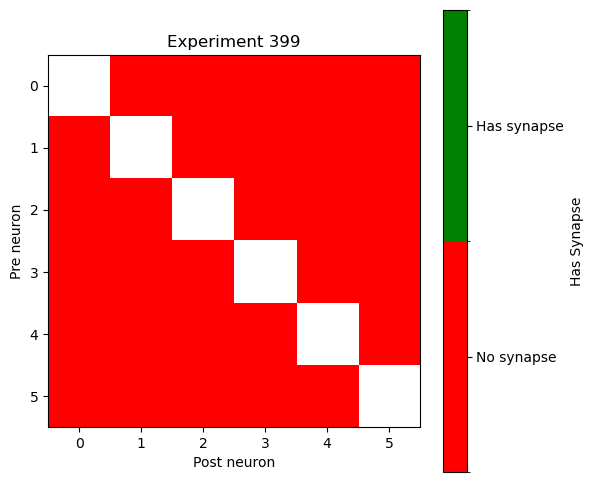

56


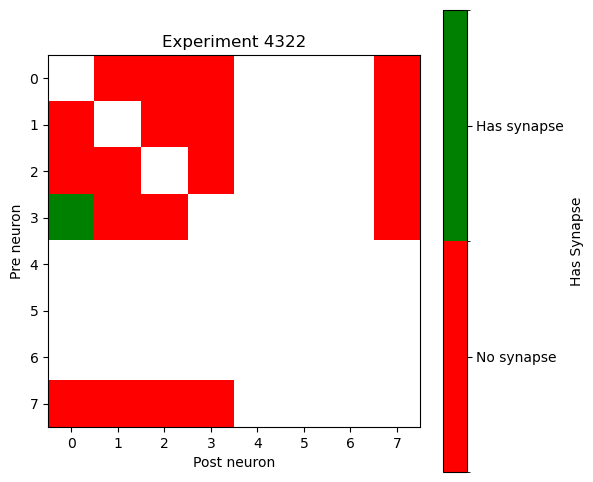

56


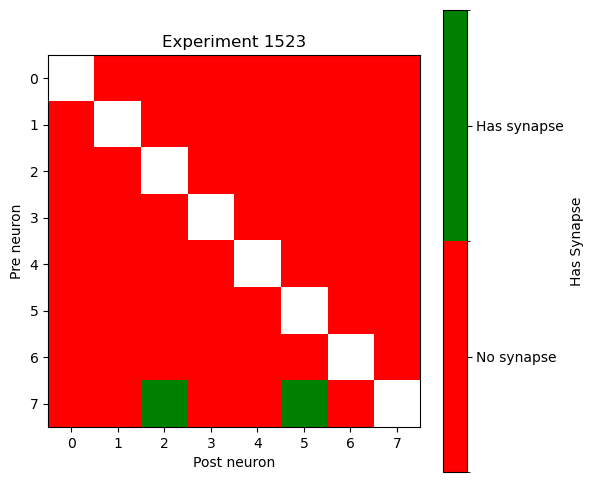

6


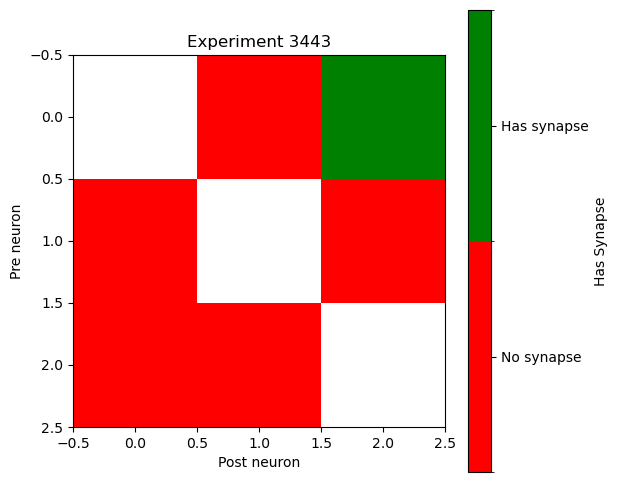

30


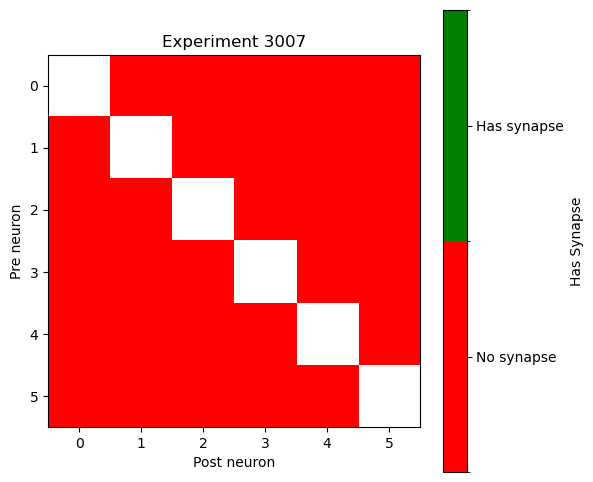

56


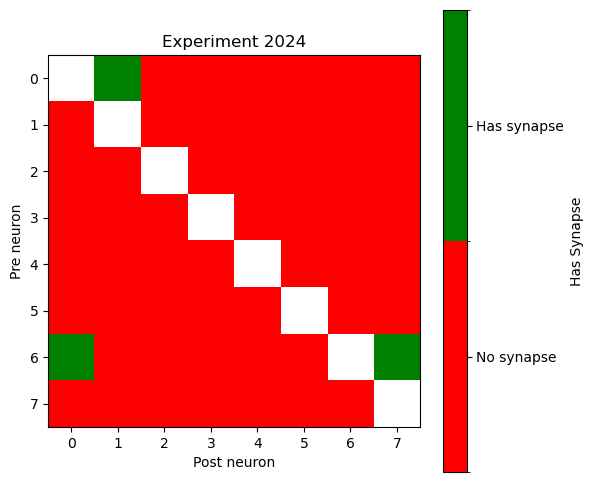

30


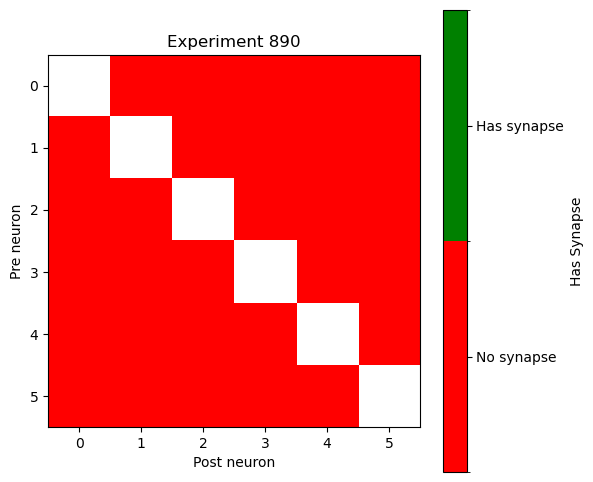

56


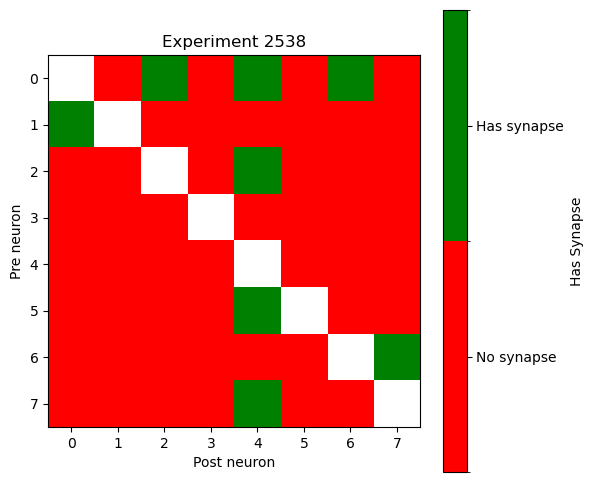

30


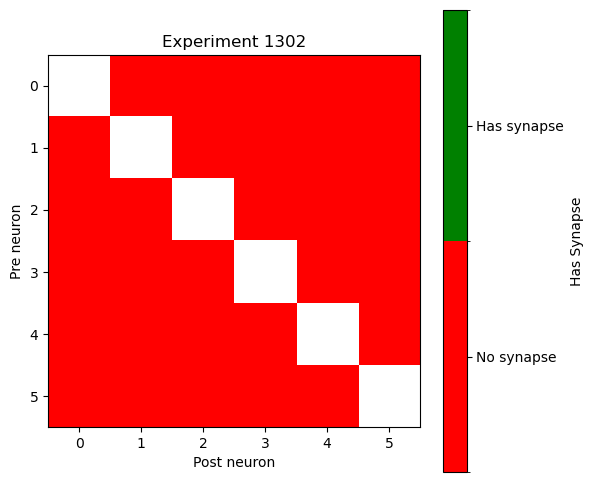

20


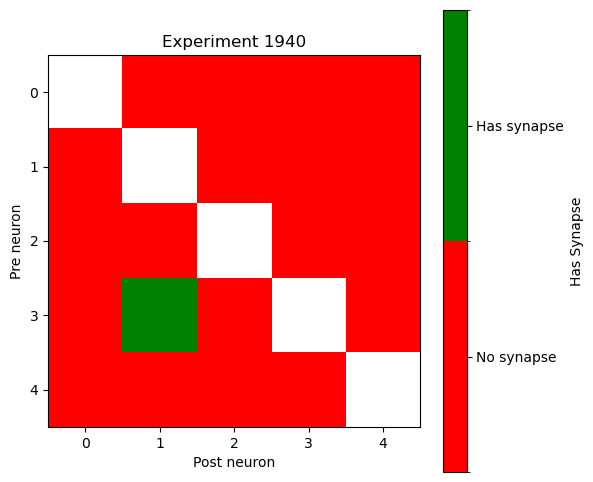

10


In [15]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import random

# Filter data without NaN in has_synapse
df_pair_nonan = df_pair.dropna(subset=['has_synapse']) # This dataframe contains only when there is not NaN values in has_synapse
count = 0
stop = 10  # Because there are so many, I only plot 10 for now

chosen = np.random.choice(uniq, size=10, replace=False)  # Randomly choose some to look at because it is so many

# Loop through experiments where there was not NaN (i.e. which experiments contained at least one not NaN)
# for exp_id in df_pair_nonan['experiment_id'].unique():  # for all experiments (ID) without NaN
for exp_id in chosen:
    if count > stop:
        break
    else:
        df_exp = df_pair[df_pair['experiment_id'] == exp_id]  # All experiments with current experiment ID (dataframe) NOTE: we don't use NaN filtering here
        count+=1  # 3123 in total, so will be many plots.

        # Get unique neuron IDs
        neurons = np.union1d(df_exp['pre_cell_id'].unique(), df_exp['post_cell_id'].unique())  # Union (skips duplicates) of participating neuron IDs (regardless of pre- or postsynaptic)
        neuron_to_idx = {neuron: idx for idx, neuron in enumerate(neurons)}  # dictionary with neuronID: idx for however many neurons participated in current experiment ID

        print(len(df_exp))

        # Initialize matrix with NaNs
        N = len(neurons)  # Number of neurons
        W = np.full((N, N), np.nan)  # N * N matrix where N = number of neurons

        # Fill the matrix
        for _, row in df_exp.iterrows():
            pre = neuron_to_idx[row['pre_cell_id']]
            post = neuron_to_idx[row['post_cell_id']]
            W[pre, post] = row['has_synapse']

        # Create discrete colormap
        colors = ['red', 'green']  # 0.0 → red, 1.0 → green
        cmap = ListedColormap(colors).with_extremes(bad='white')  # NaN will be white
        bounds = [-0.5, 0.5, 1.5]  # bounds for 0 and 1
        norm = BoundaryNorm(bounds, cmap.N)

        # Display the matrix
        plt.figure(figsize=(6, 6))
        plt.imshow(W, cmap=cmap, norm=norm)
        plt.title(f'Experiment {exp_id}')
        plt.xlabel('Post neuron')
        plt.ylabel('Pre neuron')

        # Create discrete colorbar with labels
        cbar = plt.colorbar(ticks=[0, 1])
        cbar.ax.set_yticklabels(['No synapse', 'Has synapse'])
        cbar.set_label('Has Synapse')

        plt.show()

print(count)

# F/I 

In [16]:
table_name = table_list[10][0]
df_fi = pd.read_sql_query("SELECT * from " + str(table_list[10])[2:-3], con)
display(Markdown(f"### Table: {table_name}"))
display(df_fi)

### Table: intrinsic

,id,cell_id,rheobase,fi_slope,input_resistance,input_resistance_ss,sag,tau,sag_peak_t,sag_depol,...,chirp_peak_ratio,chirp_peak_impedance,chirp_sync_freq,chirp_inductive_phase,isi_adapt_ratio,upstroke_adapt_ratio,downstroke_adapt_ratio,width_adapt_ratio,threshold_v_adapt_ratio,meta
0,1,22320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
1,2,22321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
2,3,22322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
3,4,22323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
4,5,9771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,18159,24758,NaN,NaN,6.384582e+07,6.060694e+07,0.042229,NaN,0.900203,0.239550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
17936,18160,24761,NaN,NaN,2.476528e+07,2.894325e+07,0.045504,NaN,0.839213,0.432015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
17937,18161,24762,NaN,NaN,8.121874e+07,8.092382e+07,0.059986,NaN,0.523748,0.644732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
17938,18571,24815,NaN,NaN,9.230012e+07,9.277698e+07,0.037984,0.006541,0.274203,0.589737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null


In [17]:
display(df_result)  # df_result so far

,experiment_id,pair_id,pre_cell_id,post_cell_id,psp_amplitude
0,21,877,141,144,NaN
1,64,2961,450,456,-0.000286
2,66,3097,469,467,NaN
3,67,3167,475,478,NaN
4,67,3168,475,479,-0.001036
...,...,...,...,...,...
3292,5265,123766,24832,24835,NaN
3293,5265,123775,24835,24831,NaN
3294,5265,123776,24835,24832,NaN
3295,5268,123799,24843,24844,NaN


In [18]:
test = df_result.copy()
test2 = df_fi.copy()
test3 = test2.drop(columns=["cell_id"])
display(test3)

,id,rheobase,fi_slope,input_resistance,input_resistance_ss,sag,tau,sag_peak_t,sag_depol,sag_peak_t_depol,...,chirp_peak_ratio,chirp_peak_impedance,chirp_sync_freq,chirp_inductive_phase,isi_adapt_ratio,upstroke_adapt_ratio,downstroke_adapt_ratio,width_adapt_ratio,threshold_v_adapt_ratio,meta
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,18159,NaN,NaN,6.384582e+07,6.060694e+07,0.042229,NaN,0.900203,0.239550,0.544633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
17936,18160,NaN,NaN,2.476528e+07,2.894325e+07,0.045504,NaN,0.839213,0.432015,0.922163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
17937,18161,NaN,NaN,8.121874e+07,8.092382e+07,0.059986,NaN,0.523748,0.644732,0.443143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null
17938,18571,NaN,NaN,9.230012e+07,9.277698e+07,0.037984,0.006541,0.274203,0.589737,0.725578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,null


In [19]:
# I want to take the values of pre_cell_id and post_cell_id and search for their fi_slope in table 10
# F/I is in 10

df_fi = pd.read_sql_query("SELECT * from " + str(table_list[10])[2:-3], con)  # Shows the "Intrinsic" dataframe
df_fi = df_fi[['cell_id', 'fi_slope']]

# Search for the values of pre_cell_id and post_cell_id in table 10
# Presynaptic
df_result = df_result.merge(df_fi, left_on='pre_cell_id', right_on='cell_id')  # where is cell_id == pre_cell_id, concatenate 
df_result = df_result.rename(columns={'fi_slope': 'fi_slope_pre'})  #rename fi_slope column
df_result = df_result.drop(columns=['cell_id'])  # drop cell_id column
# Postsynaptic
df_result = df_result.merge(df_fi, left_on='post_cell_id', right_on='cell_id')
df_result = df_result.rename(columns={'fi_slope': 'fi_slope_post'})
df_result = df_result.drop(columns=['cell_id'])

# print("Result dataframe:", df_result)
display(df_result)

,experiment_id,pair_id,pre_cell_id,post_cell_id,psp_amplitude,fi_slope_pre,fi_slope_post
0,21,877,141,144,NaN,NaN,NaN
1,64,2961,450,456,-0.000286,NaN,NaN
2,66,3097,469,467,NaN,NaN,NaN
3,67,3167,475,478,NaN,NaN,NaN
4,67,3168,475,479,-0.001036,NaN,NaN
...,...,...,...,...,...,...,...
3275,5114,123700,24809,24808,-0.000297,NaN,NaN
3276,5117,123712,24813,24814,0.000379,7.079645e-14,7.336674e-13
3277,5117,123714,24814,24813,NaN,7.336674e-13,7.079645e-14
3278,5227,123715,24815,24816,NaN,NaN,NaN


In [20]:
print('There are', len(df_result['experiment_id'].unique()), 'different experiments out of', len(df_result), 'data points.')

There are 1401 different experiments out of 3280 data points.


Text(0.5, 0, 'PSP Amplitude (mV)')

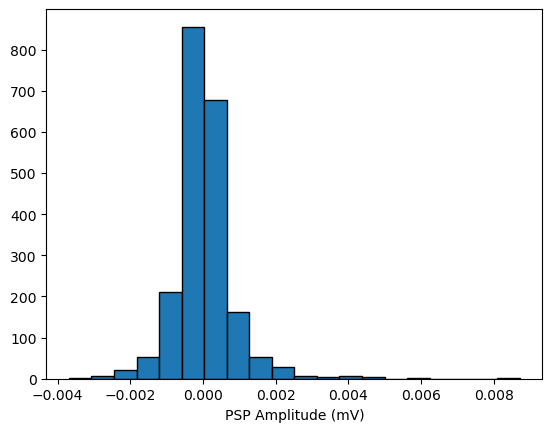

In [21]:
plt.hist(df_result['psp_amplitude'], bins=20, edgecolor='k')
plt.xlabel('PSP Amplitude (mV)')

# Motifs

In [22]:
test = df_result[['pre_cell_id', 'post_cell_id']]
display(test)
test2 = pd.unique(df_result[['pre_cell_id', 'post_cell_id']].values.ravel())
display(test2)

,pre_cell_id,post_cell_id
0,141,144
1,450,456
2,469,467
3,475,478
4,475,479
...,...,...
3275,24809,24808
3276,24813,24814
3277,24814,24813
3278,24815,24816


array([  141,   144,   450, ..., 24814, 24815, 24816])

In [23]:
# Get all cells involved in a synapse
all_cells = np.sort(pd.unique(df_result[['pre_cell_id', 'post_cell_id']].values.ravel()))

# Create a DataFrame of zeros with index and columns corresponding to all cells
df_psp_matrix = pd.DataFrame(0.0, index=all_cells, columns=all_cells)

# Fill the dataframe with psp_amplitude values where information exists
for _, row in df_result.iterrows():
    pre_cell = row['pre_cell_id']
    post_cell = row['post_cell_id']
    psp_value = row['psp_amplitude']
    df_psp_matrix.loc[pre_cell, post_cell] = psp_value
    
# Set NaN values to 0
df_psp_matrix.fillna(0, inplace=True)
print(rf'There are {df_psp_matrix.size} elements in the PSP matrix, that is {df_psp_matrix.shape[0]} rows and columns.')

# Convert the dataframe to a numpy array
psp_matrix_numpy = df_psp_matrix.values

def motifs(w,N):
   '''
   Takes the psp matrix, and how many neurons, and perform motif calculations
   
   '''
   w=w-np.mean(w)
   ww=np.matmul(w,w)
   wtw=np.matmul(w.T,w)
   wwt=np.matmul(w,w.T)
   sigma2=np.trace(wwt)/N
   tau_rec=np.trace(ww)
   tau_rec/=sigma2*N
   tau_div=np.sum(wwt)-np.trace(wwt)
   tau_div/=sigma2*N*(N-1)
   tau_con=np.sum(wtw)-np.trace(wtw)
   tau_con/=sigma2*N*(N-1)
   tau_chn=2*(np.sum(ww)-np.trace(ww))
   tau_chn/=sigma2*N*(N-1)
   return tau_rec,tau_div,tau_con,tau_chn

   


# Modify the output print to get values as simple floats
result = motifs(psp_matrix_numpy, len(all_cells))
print(f"tau_rec: {result[0].item():.5f}, tau_div: {result[1].item():.5f}, tau_con: {result[2].item():.5f}, tau_chn: {result[3].item():.5f}")


There are 15319396 elements in the PSP matrix, that is 3914 rows and columns.
tau_rec: -0.03329, tau_div: 0.00005, tau_con: 0.00004, tau_chn: 0.00000


In [24]:
# Filter experiments with more than 10 data points
experiment_counts = df_result['experiment_id'].value_counts()
valid_experiment_ids = experiment_counts[experiment_counts > 10].index
print('There are', len(valid_experiment_ids), 'experiments with more than 10 data points.')

# Load region information
df_experiment = pd.read_sql_query("SELECT * from " + str(table_list[3])[2:-3], con)

display(df_experiment)

There are 11 experiments with more than 10 data points.


,id,ext_id,slice_id,project_name,date,target_region,internal,acsf,target_temperature,rig_name,operator_name,storage_path,ephys_file,acq_timestamp,meta
0,1,1475616037.928,7,mouse V1 pre-production,2016-10-04 14:20:37.928000,VisP,Standard K-Gluc,2mM Ca & Mg,22.0,MP1,Operator X,1475614653.807/slice_000/site_000,None,1.475616e+09,"{""lims_cell_cluster_id"": null, ""lims_ephys_res..."
1,2,1475621948.936,7,mouse V1 pre-production,2016-10-04 15:59:08.936000,VisP,Standard K-Gluc,2mM Ca & Mg,22.0,MP1,Operator X,1475614653.807/slice_000/site_001,None,1.475622e+09,"{""lims_cell_cluster_id"": null, ""lims_ephys_res..."
2,3,1475012780.882,2,mouse V1 pre-production,2016-09-27 14:46:20.882000,VisP,Standard K-Gluc,2mM Ca & Mg,22.0,MP1,Operator X,1475009721.756/slice_000/site_000,None,1.475013e+09,"{""lims_cell_cluster_id"": null, ""lims_ephys_res..."
3,4,1476390377.437,11,mouse V1 pre-production,2016-10-13 13:26:17.437000,VisP,Standard K-Gluc,2mM Ca & Mg,22.0,MP1,Operator X,1476389163.853/slice_000/site_000,None,1.476390e+09,"{""lims_cell_cluster_id"": null, ""lims_ephys_res..."
4,5,1475019201.614,2,mouse V1 pre-production,2016-09-27 16:33:21.614000,VisP,Standard K-Gluc,2mM Ca & Mg,22.0,MP1,Operator X,1475009721.756/slice_000/site_002,None,1.475019e+09,"{""lims_cell_cluster_id"": null, ""lims_ephys_res..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5053,5265,1640120151.339,4298,patch-seq,2021-12-21 12:55:51.339000,VisP,PatchSeq,1.3mM Ca & 1mM Mg,32.0,MP2,Operator G,1640119213.879/slice_000/site_000,2021_12_21_123931-compressed.nwb,1.640120e+09,"{""lims_cell_cluster_id"": 1147725646, ""lims_eph..."
5054,5266,1640125328.417,4299,patch-seq,2021-12-21 14:22:08.417000,VisP,PatchSeq,1.3mM Ca & 1mM Mg,32.0,MP2,Operator G,1640119213.879/slice_001/site_001,2021_12_21_140137-compressed.nwb,1.640125e+09,"{""lims_cell_cluster_id"": 1147725711, ""lims_eph..."
5055,5267,1640211836.974,4300,patch-seq,2021-12-22 14:23:56.974000,VisP,PatchSeq,1.3mM Ca & 1mM Mg,32.0,MP2,Operator G,1640197062.957/slice_002/site_001,2021_12_22_141629-compressed.nwb,1.640212e+09,"{""lims_cell_cluster_id"": 1147958819, ""lims_eph..."
5056,5268,1640128228.311,4297,patch-seq,2021-12-21 15:10:28.311000,VisP,PatchSeq,1.3mM Ca & 1mM Mg,32.0,MP2,Operator G,1640119213.879/slice_002/site_000,2021_12_21_150826-compressed.nwb,1.640128e+09,"{""lims_cell_cluster_id"": 1147725581, ""lims_eph..."


In [25]:
# Filter experiments with more than 10 data points
experiment_counts = df_result['experiment_id'].value_counts()
valid_experiment_ids = experiment_counts[experiment_counts > 10].index
print('There are', len(valid_experiment_ids), 'experiments with more than 10 data points.')

# Load region information
df_experiment = pd.read_sql_query("SELECT * from " + str(table_list[3])[2:-3], con)

# Dictionary to store results by experiment
motifs_results = {}

# Iterate over each valid experiment
for exp_id in valid_experiment_ids:
    # Get the experiment's region
    region = df_experiment[df_experiment['id'] == exp_id]['target_region'].values[0]

    # Filter data for the experiment
    df_exp = df_result[df_result['experiment_id'] == exp_id]

    # Get all cells involved in the current experiment
    all_cells = np.sort(pd.unique(df_exp[['pre_cell_id', 'post_cell_id']].values.ravel()))

    # Create PSP matrix for the experiment
    df_psp_matrix = pd.DataFrame(0.0, index=all_cells, columns=all_cells)

    # Fill the matrix with PSP values
    for _, row in df_exp.iterrows():
        pre_cell = row['pre_cell_id']
        post_cell = row['post_cell_id']
        psp_value = row['psp_amplitude']
        df_psp_matrix.loc[pre_cell, post_cell] = psp_value

    # Replace NaN with 0
    df_psp_matrix.fillna(0, inplace=True)

    # Convert to numpy array
    psp_matrix_numpy = df_psp_matrix.values

    # Calculate motifs for the current experiment
    motifs_results[exp_id] = (region, motifs(psp_matrix_numpy, len(all_cells)))

# Print the results
for exp_id, (region, motif_values) in motifs_results.items():
    print(f'Experiment {exp_id} (Region: {region}): τ_rec={motif_values[0]}, τ_div={motif_values[1]}, τ_con={motif_values[2]}, τ_chn={motif_values[3]}')

There are 11 experiments with more than 10 data points.
Experiment 3172 (Region: VisP): τ_rec=-0.19207744240472954, τ_div=0.14455769506443633, τ_con=-0.013817915154343368, τ_chn=-0.22389940181089119
Experiment 2771 (Region: VisP): τ_rec=-0.1935104674504693, τ_div=-0.03370148948722688, τ_con=0.181667497814604, τ_chn=-0.25238124177691645
Experiment 2698 (Region: TCx): τ_rec=-0.03180650208529263, τ_div=-0.0013718426643657253, τ_con=0.11679549678930294, τ_chn=-0.17929122936875627
Experiment 3228 (Region: VisP): τ_rec=-0.15391183671009562, τ_div=0.16855215810676905, τ_con=-0.0140018694692305, τ_chn=-0.09987811254669428
Experiment 2808 (Region: VisP): τ_rec=-0.11316489128490907, τ_div=0.04048852099907911, τ_con=-0.03649667985703244, τ_chn=-0.22632978256981817
Experiment 469 (Region: VisP): τ_rec=0.04849319018798921, τ_div=0.06770240399571112, τ_con=-0.10650776288652679, τ_chn=-0.025885091069321145
Experiment 1717 (Region: TCx): τ_rec=-0.077454613696441, τ_div=0.02478329743031749, τ_con=0.016

There are 15 experiments with more than 10 data points.


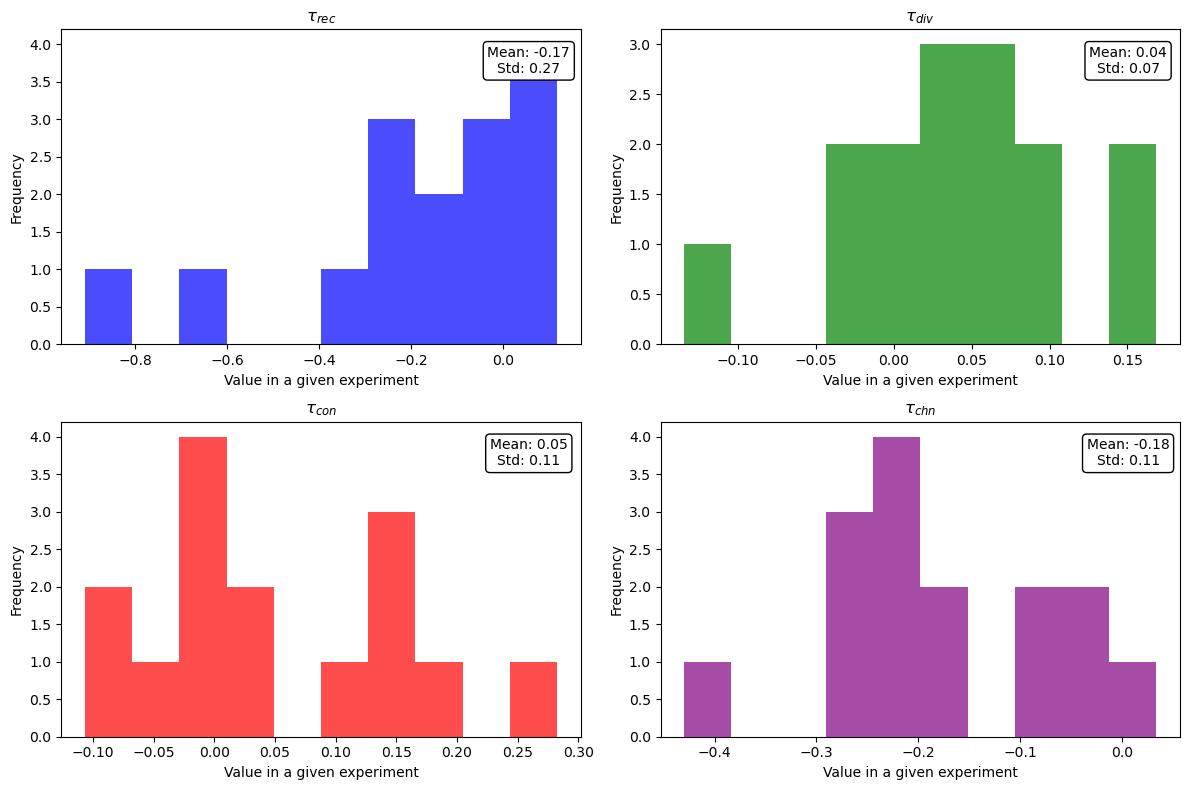

In [26]:
# Filter experiments with more than 10 data points
experiment_counts = df_result['experiment_id'].value_counts()
valid_experiment_ids = experiment_counts[experiment_counts >= 10].index
print('There are', len(valid_experiment_ids), 'experiments with more than 10 data points.')

# Load region information
df_experiment = pd.read_sql_query("SELECT * from " + str(table_list[3])[2:-3], con)

# Dictionary to store tau values
taus = {'tau_rec': [], 'tau_div': [], 'tau_con': [], 'tau_chn': []}

# Iterate over each valid experiment
for exp_id in valid_experiment_ids:
    # Get the experiment's region
    region = df_experiment[df_experiment['id'] == exp_id]['target_region'].values[0]

    # Filter data for the experiment
    df_exp = df_result[df_result['experiment_id'] == exp_id]

    # Get all cells involved in the current experiment
    all_cells = np.sort(pd.unique(df_exp[['pre_cell_id', 'post_cell_id']].values.ravel()))

    # Create PSP matrix for the experiment
    df_psp_matrix = pd.DataFrame(0.0, index=all_cells, columns=all_cells)

    # Fill the matrix with PSP values
    for _, row in df_exp.iterrows():
        pre_cell = row['pre_cell_id']
        post_cell = row['post_cell_id']
        psp_value = row['psp_amplitude']
        df_psp_matrix.loc[pre_cell, post_cell] = psp_value

    # Replace NaN with 0
    df_psp_matrix.fillna(0, inplace=True)

    # Convert to numpy array
    psp_matrix_numpy = df_psp_matrix.values

    # Calculate motifs for the current experiment
    tau_rec, tau_div, tau_con, tau_chn = motifs(psp_matrix_numpy, len(all_cells))

    # Store the values in the list
    taus['tau_rec'].append(tau_rec)
    taus['tau_div'].append(tau_div)
    taus['tau_con'].append(tau_con)
    taus['tau_chn'].append(tau_chn)

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(taus['tau_rec'], color='blue', alpha=0.7)
axes[0, 0].set_title(r'$\tau_{rec}$')

axes[0, 1].hist(taus['tau_div'], color='green', alpha=0.7)
axes[0, 1].set_title(r'$\tau_{div}$')

axes[1, 0].hist(taus['tau_con'],  color='red', alpha=0.7)
axes[1, 0].set_title(r'$\tau_{con}$')

axes[1, 1].hist(taus['tau_chn'], color='purple', alpha=0.7)
axes[1, 1].set_title(r'$\tau_{chn}$')


# Dictionary that maps titles to tau dictionary keys
title_to_key = {
    r'$\tau_{rec}$': 'tau_rec',
    r'$\tau_{div}$': 'tau_div',
    r'$\tau_{con}$': 'tau_con',
    r'$\tau_{chn}$': 'tau_chn'
}

# Add statistics to each plot
for ax in axes.flat:
    title = ax.get_title()
    if title in title_to_key:
        key = title_to_key[title]
        mean_val = np.mean(taus[key])
        std_val = np.std(taus[key])
        ax.text(0.9, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}', 
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


    ax.set_xlabel('Value in a given experiment')
    ax.set_ylabel('Frequency')
    

plt.tight_layout()
plt.show()

In [27]:
# Exclude NaN values in 'psp_amplitude' and negative values
df_filtered = df_result.dropna(subset=['psp_amplitude'])

display(df_filtered)

,experiment_id,pair_id,pre_cell_id,post_cell_id,psp_amplitude,fi_slope_pre,fi_slope_post
1,64,2961,450,456,-0.000286,NaN,NaN
4,67,3168,475,479,-0.001036,NaN,NaN
8,67,3185,479,475,-0.001491,NaN,NaN
10,79,3729,560,559,0.000937,NaN,NaN
11,89,4180,631,632,0.000256,NaN,NaN
...,...,...,...,...,...,...,...
3271,5112,123684,24802,24804,-0.000475,NaN,NaN
3272,5113,123692,24805,24807,0.003843,NaN,NaN
3273,5113,123695,24807,24805,-0.000207,NaN,NaN
3275,5114,123700,24809,24808,-0.000297,NaN,NaN


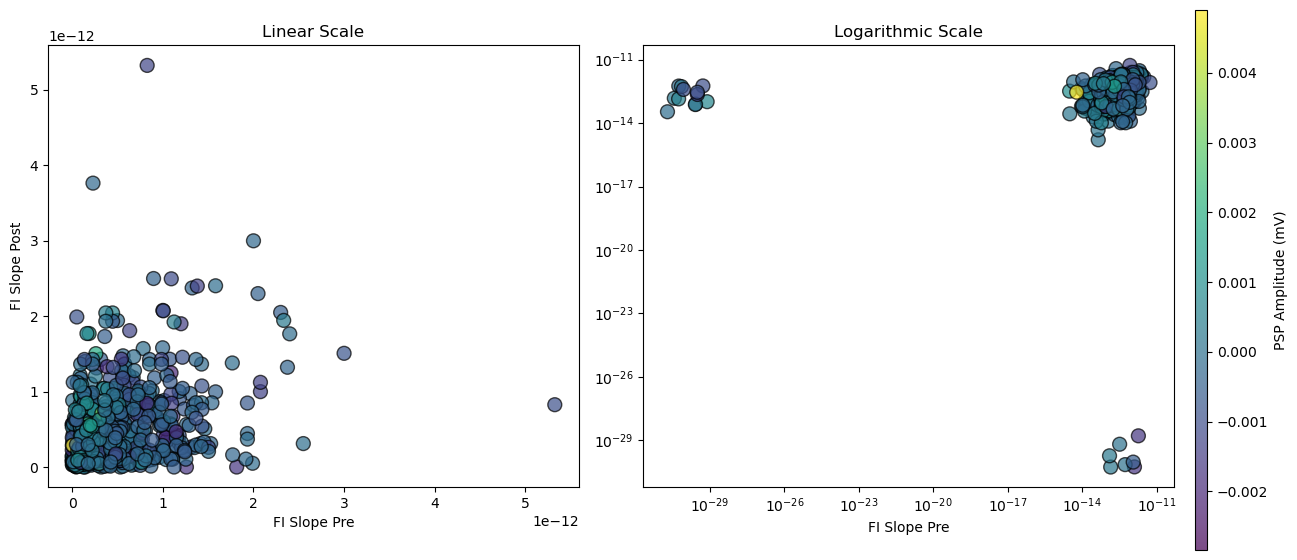

In [28]:
# Exclude NaN values in 'psp_amplitude' and negative values
df_filtered = df_result.dropna(subset=['psp_amplitude'])
df_filtered = df_filtered[(df_filtered['fi_slope_pre'] > 0) & (df_filtered['fi_slope_post'] > 0)]  # question: why exclude negative fi slope values

# Create the figure with two subplots without shared axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First plot with linear scale
sc1 = axs[0].scatter(df_filtered['fi_slope_pre'], df_filtered['fi_slope_post'], 
                      c=np.log1p(df_filtered['psp_amplitude']), cmap='viridis', edgecolors='k', 
                      s=100, alpha=0.7)

axs[0].set_xlabel('FI Slope Pre')
axs[0].set_ylabel('FI Slope Post')
axs[0].set_title('Linear Scale')

# Second plot with logarithmic scale
sc2 = axs[1].scatter(df_filtered['fi_slope_pre'], df_filtered['fi_slope_post'], 
                      c=np.log1p(df_filtered['psp_amplitude']), cmap='viridis', edgecolors='k', 
                      s=100, alpha=0.7)
axs[1].set_xlabel('FI Slope Pre')
axs[1].set_title('Logarithmic Scale')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

# Adjust the layout to leave space at the top
plt.tight_layout(rect=[0, 0, 1, 0.9])

# Create an additional axis for the colorbar at the top
cbar_ax = fig.add_axes([1, 0, 0.01, 0.9])
cbar = fig.colorbar(sc1, cax=cbar_ax, orientation='vertical')
cbar.set_label('PSP Amplitude (mV)')

plt.show()




In [31]:
# Excluir valores NaN en 'psp_amplitude'
df_result_exclude = df_result.dropna(subset=['psp_amplitude'])


c:\Users\Silje\miniconda3\envs\aisynphys39\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Silje\AppData\Local\Temp\ipykernel_23964\291980456.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_exclude['cluster'] = None


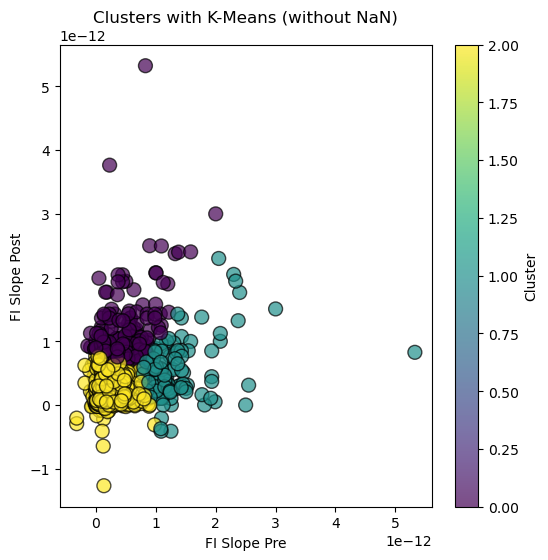

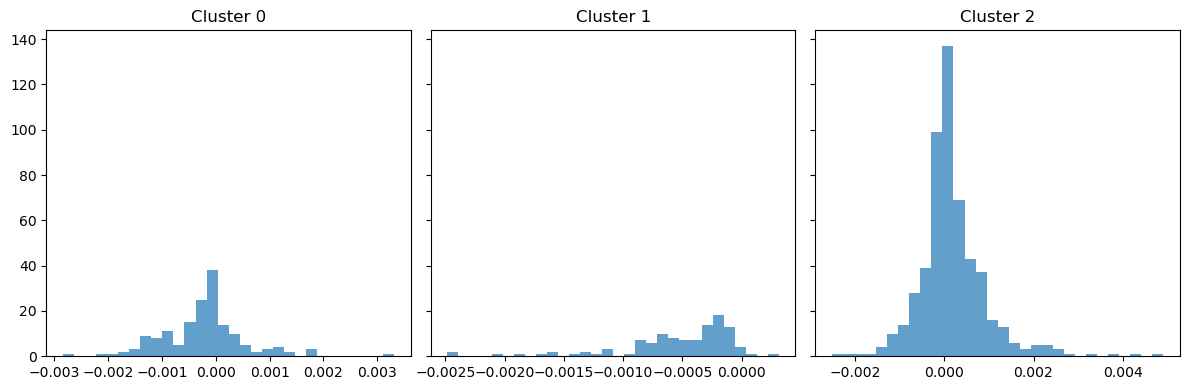

In [37]:
from sklearn.cluster import KMeans

# KMeans: Each point is assigned to nearest center (cluster "means")
# Nearest neighbor
# Update
# Repeat until convergence

# Possible fix to threading warning
import os
os.environ["OMP_NUM_THREADS"] = "4"

# Select the columns needed for clustering
# and remove rows with NaN values
df_no_nan = df_result_exclude[['fi_slope_pre', 'fi_slope_post']].dropna()

# Convert to numpy array for K-Means
X = df_no_nan.values

# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Create a 'cluster' column in df_no_nan
df_no_nan['cluster'] = kmeans.labels_


df_result_exclude['cluster'] = None
df_result_exclude.loc[df_no_nan.index, 'cluster'] = df_no_nan['cluster']

# Plot to verify
plt.figure(figsize=(6, 6))
sc = plt.scatter(
    df_no_nan['fi_slope_pre'], 
    df_no_nan['fi_slope_post'], 
    c=df_no_nan['cluster'], 
    cmap='viridis', 
    edgecolors='k', 
    s=100, 
    alpha=0.7
)

plt.xlabel('FI Slope Pre')
plt.ylabel('FI Slope Post')
plt.title('Clusters with K-Means (without NaN)')
plt.colorbar(sc, label='Cluster')
plt.show()

# Finally, make histograms of psp_amplitude for each cluster
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for i in range(3):
    cluster_data = df_result_exclude[df_result_exclude['cluster'] == i]
    axs[i].hist(cluster_data['psp_amplitude'], bins=30, alpha=0.7)
    axs[i].set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()



In [36]:
# from sklearn.cluster import KMeans

# # Select the columns needed for clustering
# # and remove rows with NaN values
# df_no_nan = df_result_exclude[['fi_slope_pre', 'fi_slope_post']].dropna()

# # Convert to numpy array for K-Means
# X = df_no_nan.values

# # Apply K-Means with k=3
# kmeans = KMeans(n_clusters=3, random_state=0)
# kmeans.fit(X)

# # Create a 'cluster' column in df_no_nan
# df_no_nan['cluster'] = kmeans.labels_


# df_result_exclude['cluster'] = None
# df_result_exclude.loc[df_no_nan.index, 'cluster'] = df_no_nan['cluster']

# # Plot to verify
# plt.figure(figsize=(6, 6))
# sc = plt.scatter(
#     df_no_nan['fi_slope_pre'], 
#     df_no_nan['fi_slope_post'], 
#     c=df_no_nan['cluster'], 
#     cmap='viridis', 
#     edgecolors='k', 
#     s=100, 
#     alpha=0.7
# )

# plt.xlabel('FI Slope Pre')
# plt.ylabel('FI Slope Post')
# plt.title('Clusters with K-Means (without NaN)')
# plt.colorbar(sc, label='Cluster')
# plt.show()

# # Finally, make histograms of psp_amplitude for each cluster
# fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# for i in range(3):
#     cluster_data = df_result_exclude[df_result_exclude['cluster'] == i]
#     axs[i].hist(cluster_data['psp_amplitude'], bins=30, alpha=0.7)
#     axs[i].set_title(f'Cluster {i}')

# plt.tight_layout()
# plt.show()



c:\Users\Silje\miniconda3\envs\aisynphys39\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Silje\AppData\Local\Temp\ipykernel_23964\2110228378.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(clusters))


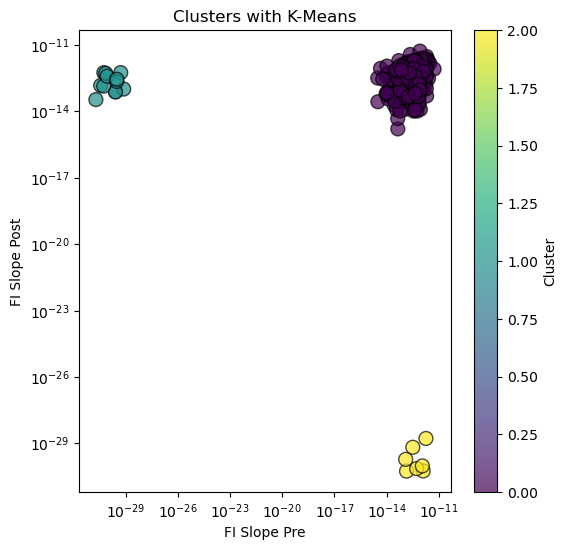

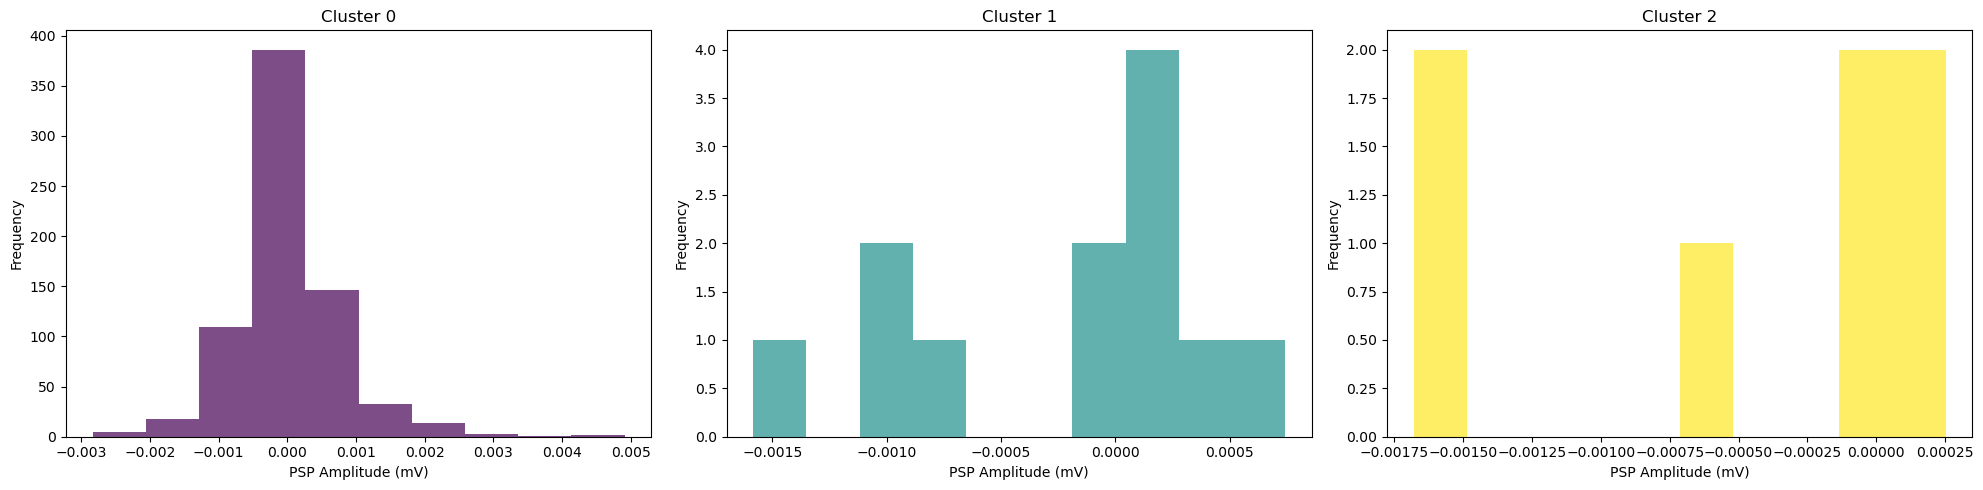

In [39]:
import matplotlib.cm as cm

# 1) Exclude non-positive values in fi_slope_pre and fi_slope_post
df_clean = df_result_exclude[
    (df_result_exclude['fi_slope_pre'] > 0) & 
    (df_result_exclude['fi_slope_post'] > 0)
].copy()

# 2) Create logarithmic version of fi_slope_pre and fi_slope_post
df_clean_log = df_clean[['fi_slope_pre', 'fi_slope_post']].apply(np.log10)

# 3) Apply K-Means on logarithmic data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_clean_log)

# Save the cluster labels in the original DataFrame (df_clean)
df_clean['cluster'] = kmeans.labels_

# Get unique clusters
clusters = sorted(df_clean['cluster'].unique())

# Get the colormap used in the scatter plot
cmap = cm.get_cmap('viridis', len(clusters))
colors = [cmap(i) for i in range(len(clusters))]

# 4) Plot in log scale on axes
plt.figure(figsize=(6, 6))
sc = plt.scatter(
    df_clean['fi_slope_pre'], 
    df_clean['fi_slope_post'], 
    c=df_clean['cluster'], 
    cmap='viridis', 
    edgecolors='k', 
    s=100, 
    alpha=0.7
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('FI Slope Pre')
plt.ylabel('FI Slope Post')
plt.title('Clusters with K-Means')
cbar = plt.colorbar(sc)
cbar.set_label('Cluster')
plt.show()

# Create a subplot for each cluster
fig, axs = plt.subplots(1, len(clusters), figsize=(20, 5))

for i, cl in enumerate(clusters):
    # Select data from cluster i
    cluster_data = df_clean[df_clean['cluster'] == cl]['psp_amplitude']
    axs[i].hist(cluster_data, alpha=0.7, color=colors[i])
    axs[i].set_title(f'Cluster {cl}')
    axs[i].set_xlabel('PSP Amplitude (mV)')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

(array([  2.,   6.,  22.,  54., 211., 856., 678., 162.,  53.,  28.,   7.,
          5.,   7.,   3.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([-3.69075452e-03, -3.07061633e-03, -2.45047814e-03, -1.83033995e-03,
        -1.21020175e-03, -5.90063564e-04,  3.00746267e-05,  6.50212817e-04,
         1.27035101e-03,  1.89048920e-03,  2.51062739e-03,  3.13076558e-03,
         3.75090377e-03,  4.37104196e-03,  4.99118015e-03,  5.61131834e-03,
         6.23145653e-03,  6.85159472e-03,  7.47173291e-03,  8.09187111e-03,
         8.71200930e-03]),
 <BarContainer object of 20 artists>)

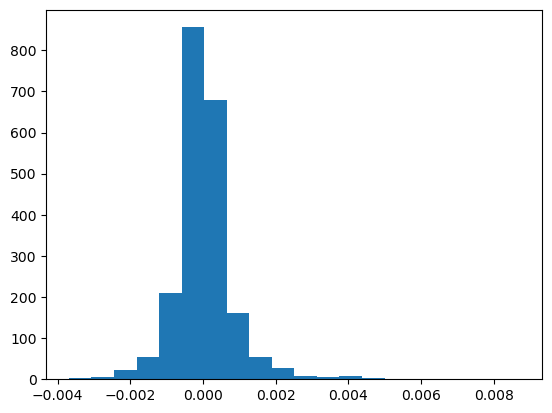

In [40]:
plt.hist(df_result['psp_amplitude'], bins=20)


In [41]:
experiment_counts = df_result['experiment_id'].value_counts()
valid_experiment_ids = experiment_counts[experiment_counts > 10].index
print('There are', len(valid_experiment_ids), 'experiments with more than 10 data points.')

df3 = pd.read_sql_query("SELECT * from " + str(table_list[3])[2:-3], con)
for experiment_id in valid_experiment_ids:
    region = df3[df3['id'] == experiment_id]['target_region'].values[0]
    print(f'Experiment {experiment_id} belongs to region {region}.')

There are 11 experiments with more than 10 data points.
Experiment 3172 belongs to region VisP.
Experiment 2771 belongs to region VisP.
Experiment 2698 belongs to region TCx.
Experiment 3228 belongs to region VisP.
Experiment 2808 belongs to region VisP.
Experiment 469 belongs to region VisP.
Experiment 1717 belongs to region TCx.
Experiment 1504 belongs to region VisP.
Experiment 3262 belongs to region VisP.
Experiment 4695 belongs to region VisP.
Experiment 1864 belongs to region VisP.


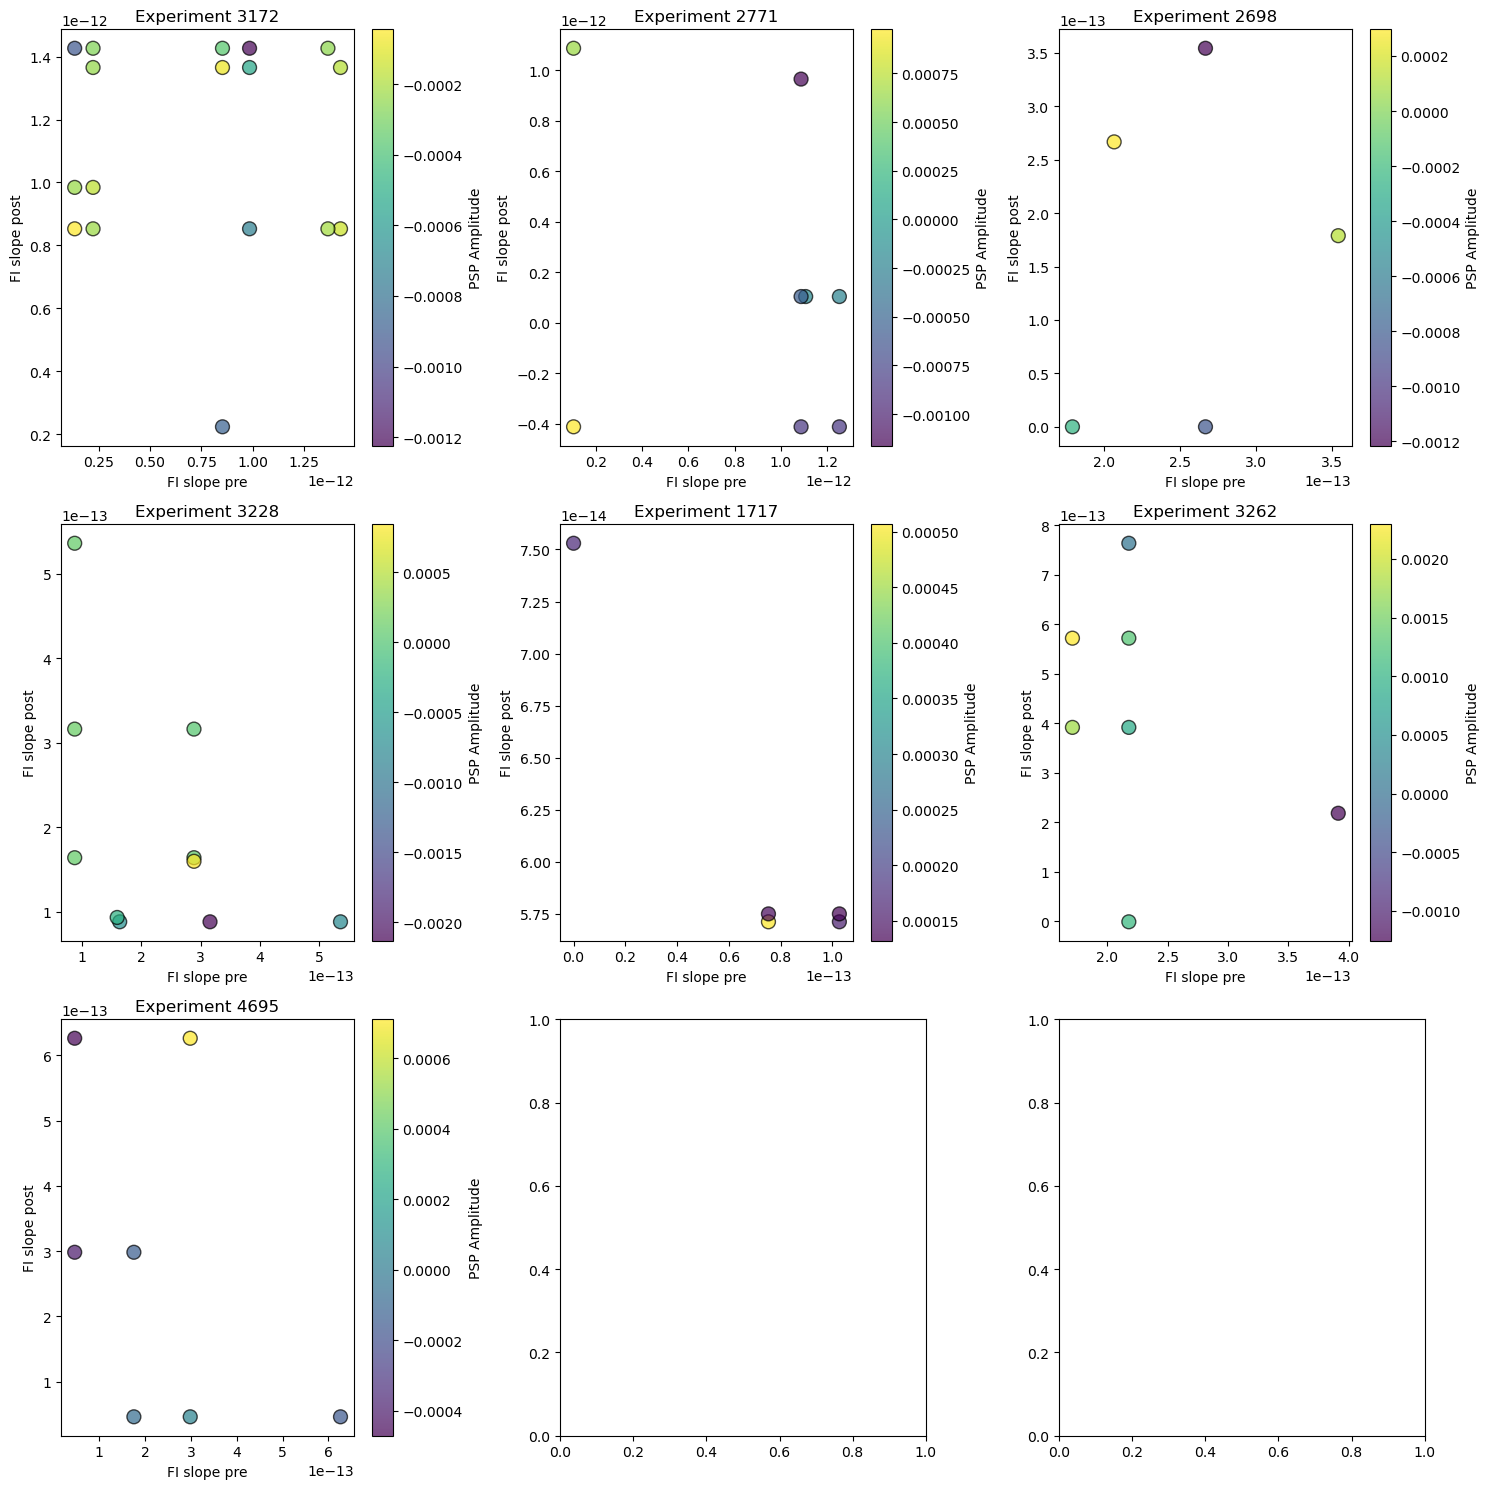

In [42]:
# Define experiments to exclude
excluded_experiments = {469, 1504, 1864, 2218, 2808, 2913}

# Filter valid experiments (without excluded ones)
valid_experiments = [experiment_id for experiment_id in valid_experiment_ids if experiment_id not in excluded_experiments]

# Number of subplots
n_experiments = len(valid_experiments)
n_cols = min(3, n_experiments)  # Maximum 3 columns
n_rows = int(np.ceil(n_experiments / n_cols))  # Required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # To facilitate iteration over subplots

for i, experiment_id in enumerate(valid_experiments):  
    df_experiment = df_result[df_result['experiment_id'] == experiment_id]

    # Exclude NaN values in 'psp_amplitude'
    df_experiment = df_experiment.dropna(subset=['psp_amplitude'])

    if df_experiment.empty:
        continue  # Skip experiments without valid data

    # Get vmin and vmax from current experiment
    vmin, vmax = df_experiment['psp_amplitude'].min(), df_experiment['psp_amplitude'].max()

    # Plot in corresponding subplot
    sc = axes[i].scatter(df_experiment['fi_slope_pre'], df_experiment['fi_slope_post'], 
                         c=df_experiment['psp_amplitude'], cmap='viridis', edgecolors='k', 
                         s=100, alpha=0.7, vmin=vmin, vmax=vmax)

    axes[i].set_xlabel('FI slope pre')
    axes[i].set_ylabel('FI slope post')
    axes[i].set_title(f"Experiment {experiment_id}")

    # Add colorbar individually
    cbar = fig.colorbar(sc, ax=axes[i])
    cbar.set_label('PSP Amplitude')

# Adjust spacing
plt.tight_layout()
plt.show()



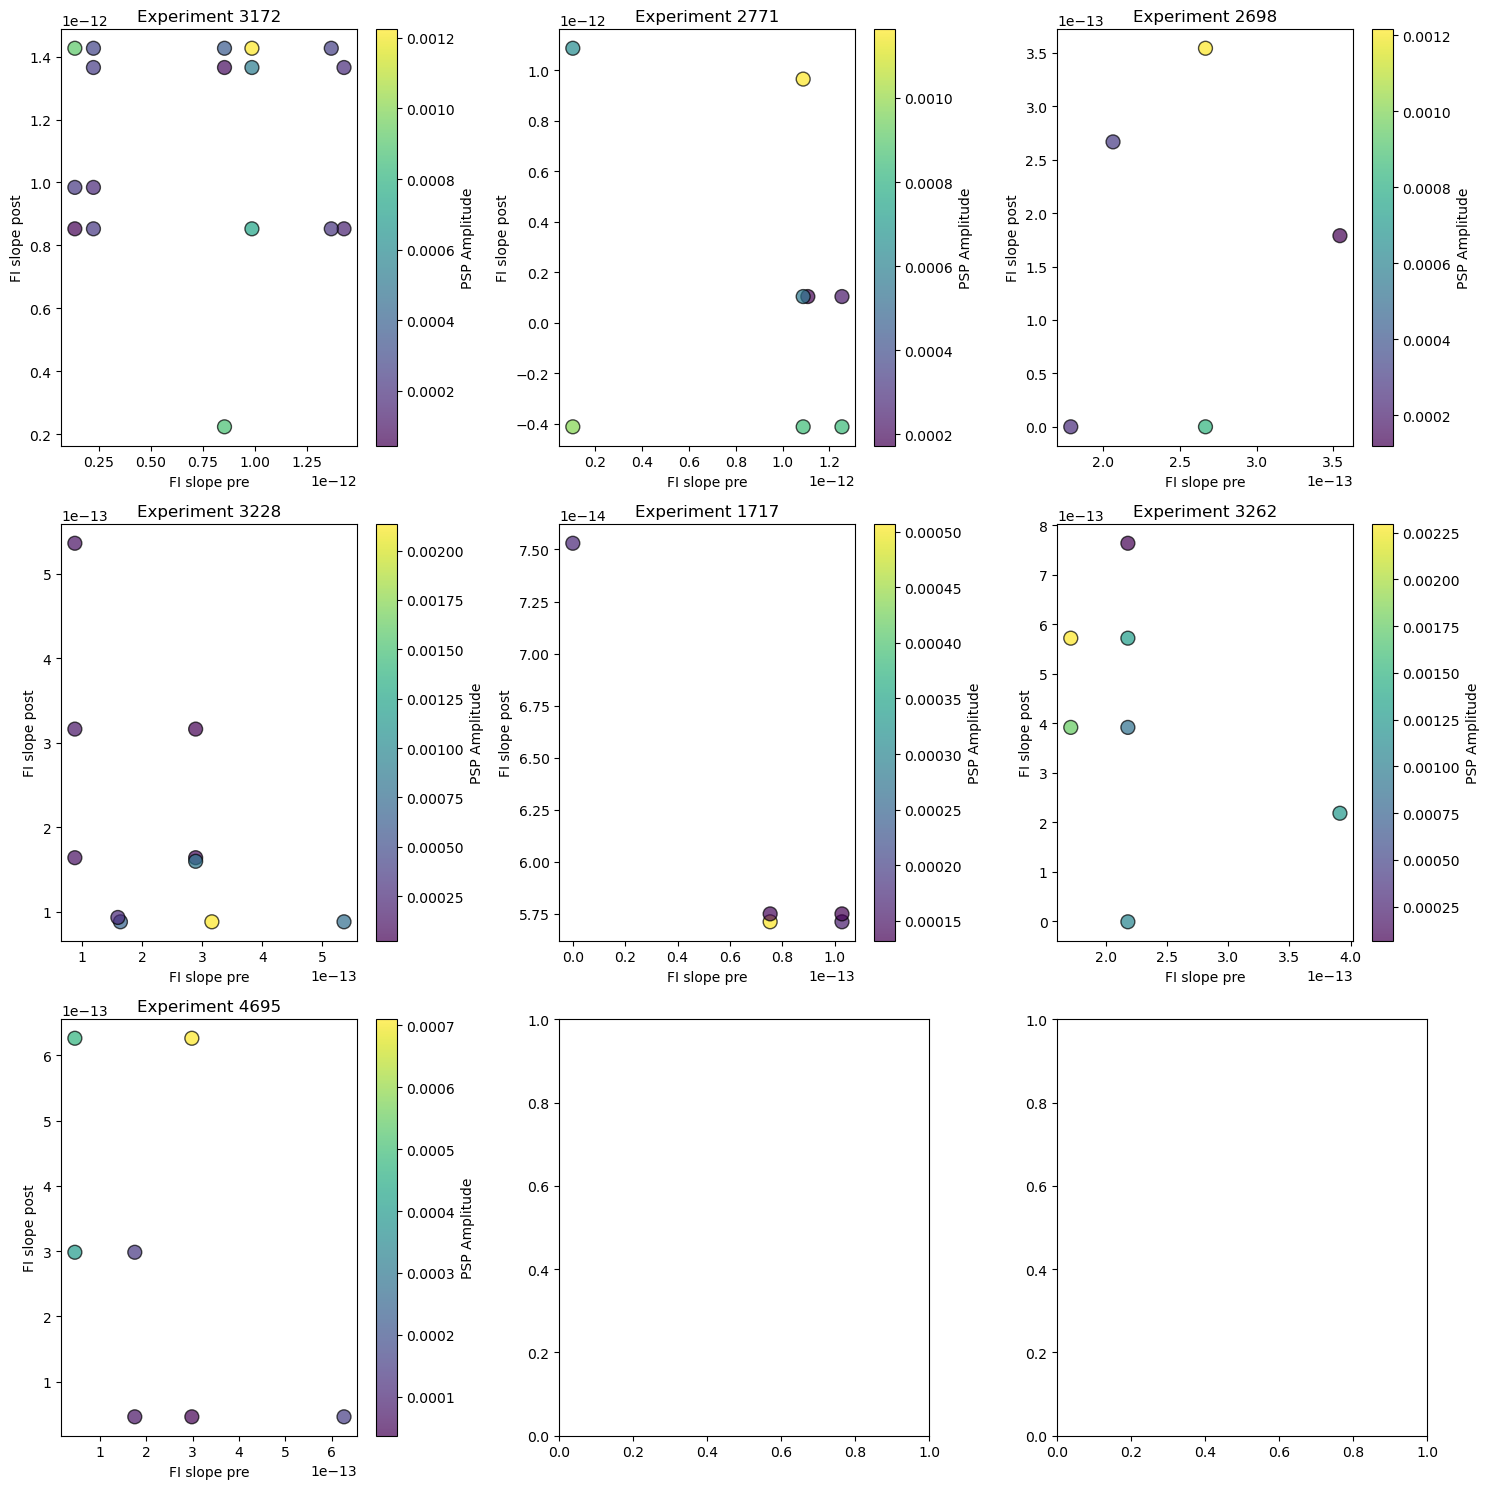

In [43]:
# Define experiments to exclude
excluded_experiments = {469, 1504, 1864, 2218, 2808, 2913}

# Filter valid experiments (without excluded ones)
valid_experiments = [experiment_id for experiment_id in valid_experiment_ids if experiment_id not in excluded_experiments]

# Number of subplots
n_experiments = len(valid_experiments)
n_cols = min(3, n_experiments)  # Maximum 3 columns
n_rows = int(np.ceil(n_experiments / n_cols))  # Required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # To facilitate iteration over subplots

for i, experiment_id in enumerate(valid_experiments):  
    df_experiment = df_result[df_result['experiment_id'] == experiment_id]

    # Exclude NaN values in 'psp_amplitude'
    df_experiment = df_experiment.dropna(subset=['psp_amplitude'])

    if df_experiment.empty:
        continue  # Skip experiments without valid data

    # Get vmin and vmax from current experiment
    vmin, vmax = df_experiment['psp_amplitude'].min(), df_experiment['psp_amplitude'].max()

    # Plot in corresponding subplot
    sc = axes[i].scatter(df_experiment['fi_slope_pre'], df_experiment['fi_slope_post'], 
                         c=np.abs(df_experiment['psp_amplitude']), cmap='viridis', edgecolors='k', 
                         s=100, alpha=0.7)

    axes[i].set_xlabel('FI slope pre')
    axes[i].set_ylabel('FI slope post')
    axes[i].set_title(f"Experiment {experiment_id}")

    # Add colorbar individually
    cbar = fig.colorbar(sc, ax=axes[i])
    cbar.set_label('PSP Amplitude')

# Adjust spacing
plt.tight_layout()
plt.show()

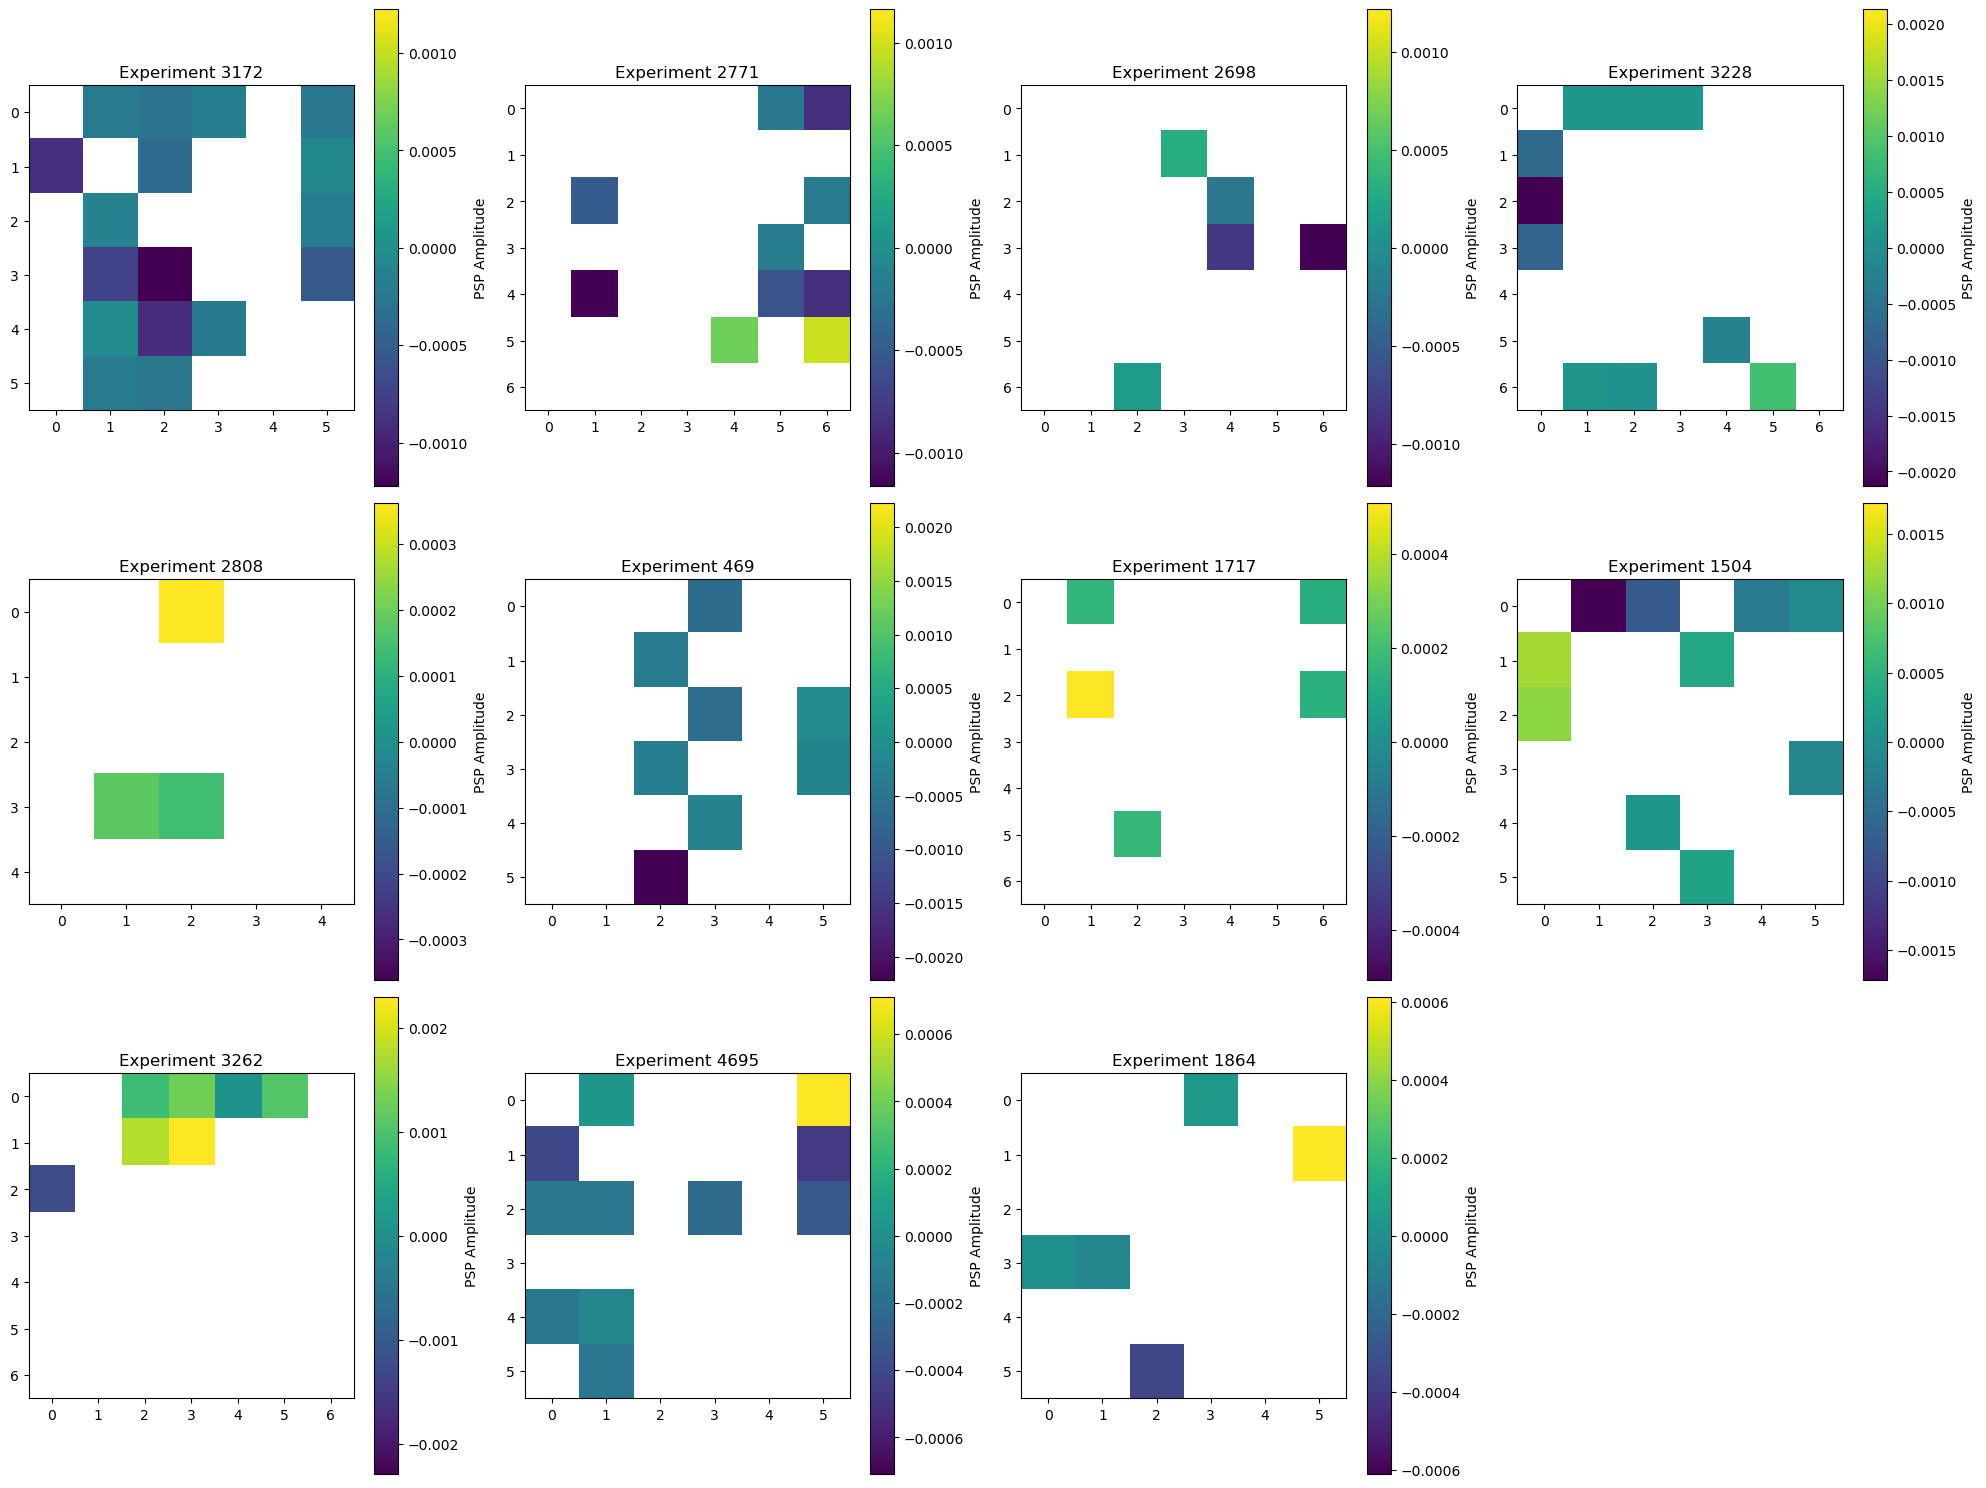

In [44]:
# Number of subplots
n_experiments = len(valid_experiment_ids)

# If there are no experiments, do nothing
if n_experiments == 0:
    print("No experiments with sufficient data were found.")
else:
    # Calculate rows and columns for subplots
    n_cols = int(np.ceil(np.sqrt(n_experiments)))  # Number of columns
    n_rows = int(np.ceil(n_experiments / n_cols))  # Number of rows
    
    # Determine figure size based on number of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

    # Flatten the axes array for easier access
    axes = axes.flatten()

    # Loop through each considered experiment
    for i, experiment_id in enumerate(valid_experiment_ids):
        df_experiment = df_result[df_result['experiment_id'] == experiment_id]
        

        # Generate PSP matrix for the experiment
        all_cells = np.sort(pd.unique(df_experiment[['pre_cell_id', 'post_cell_id']].values.ravel()))
        df_psp_matrix = pd.DataFrame(np.nan, index=all_cells, columns=all_cells)

        for _, row in df_experiment.iterrows():
            pre_cell = row['pre_cell_id']
            post_cell = row['post_cell_id']
            psp_value = row['psp_amplitude']
            df_psp_matrix.loc[pre_cell, post_cell] = psp_value

        psp_matrix_numpy = df_psp_matrix.values

        # Create a mask for NaN values
        masked_psp_matrix = np.ma.masked_invalid(psp_matrix_numpy)

        # Plot the PSP matrix in the corresponding subplot
        abs_max = np.nanmax(np.abs(psp_matrix_numpy))  # Ignore NaN when calculating maximum
        im = axes[i].imshow(masked_psp_matrix, cmap='viridis', interpolation='none', vmin=-abs_max, vmax=abs_max)
        axes[i].set_title(f'Experiment {experiment_id}')
        plt.colorbar(im, ax=axes[i], label='PSP Amplitude')

    # Remove empty axes if there are fewer experiments than subplots
    for j in range(n_experiments, len(axes)):
        axes[j].axis('off')
        axes[j].set_xticks([])
        axes[j].set_yticks([])

    # Adjust subplots
    plt.tight_layout()
    plt.show()



Experiment 469 has 12 data points.
Experiment 1504 has 11 data points.
Experiment 1717 has 11 data points.
Experiment 1864 has 11 data points.
Experiment 2218 has 10 data points.
Experiment 2698 has 13 data points.
Experiment 2771 has 13 data points.
Experiment 2808 has 12 data points.
Experiment 2913 has 10 data points.
Experiment 3172 has 19 data points.
Experiment 3209 has 10 data points.
Experiment 3228 has 13 data points.
Experiment 3262 has 11 data points.
Experiment 4318 has 10 data points.
Experiment 4695 has 11 data points.


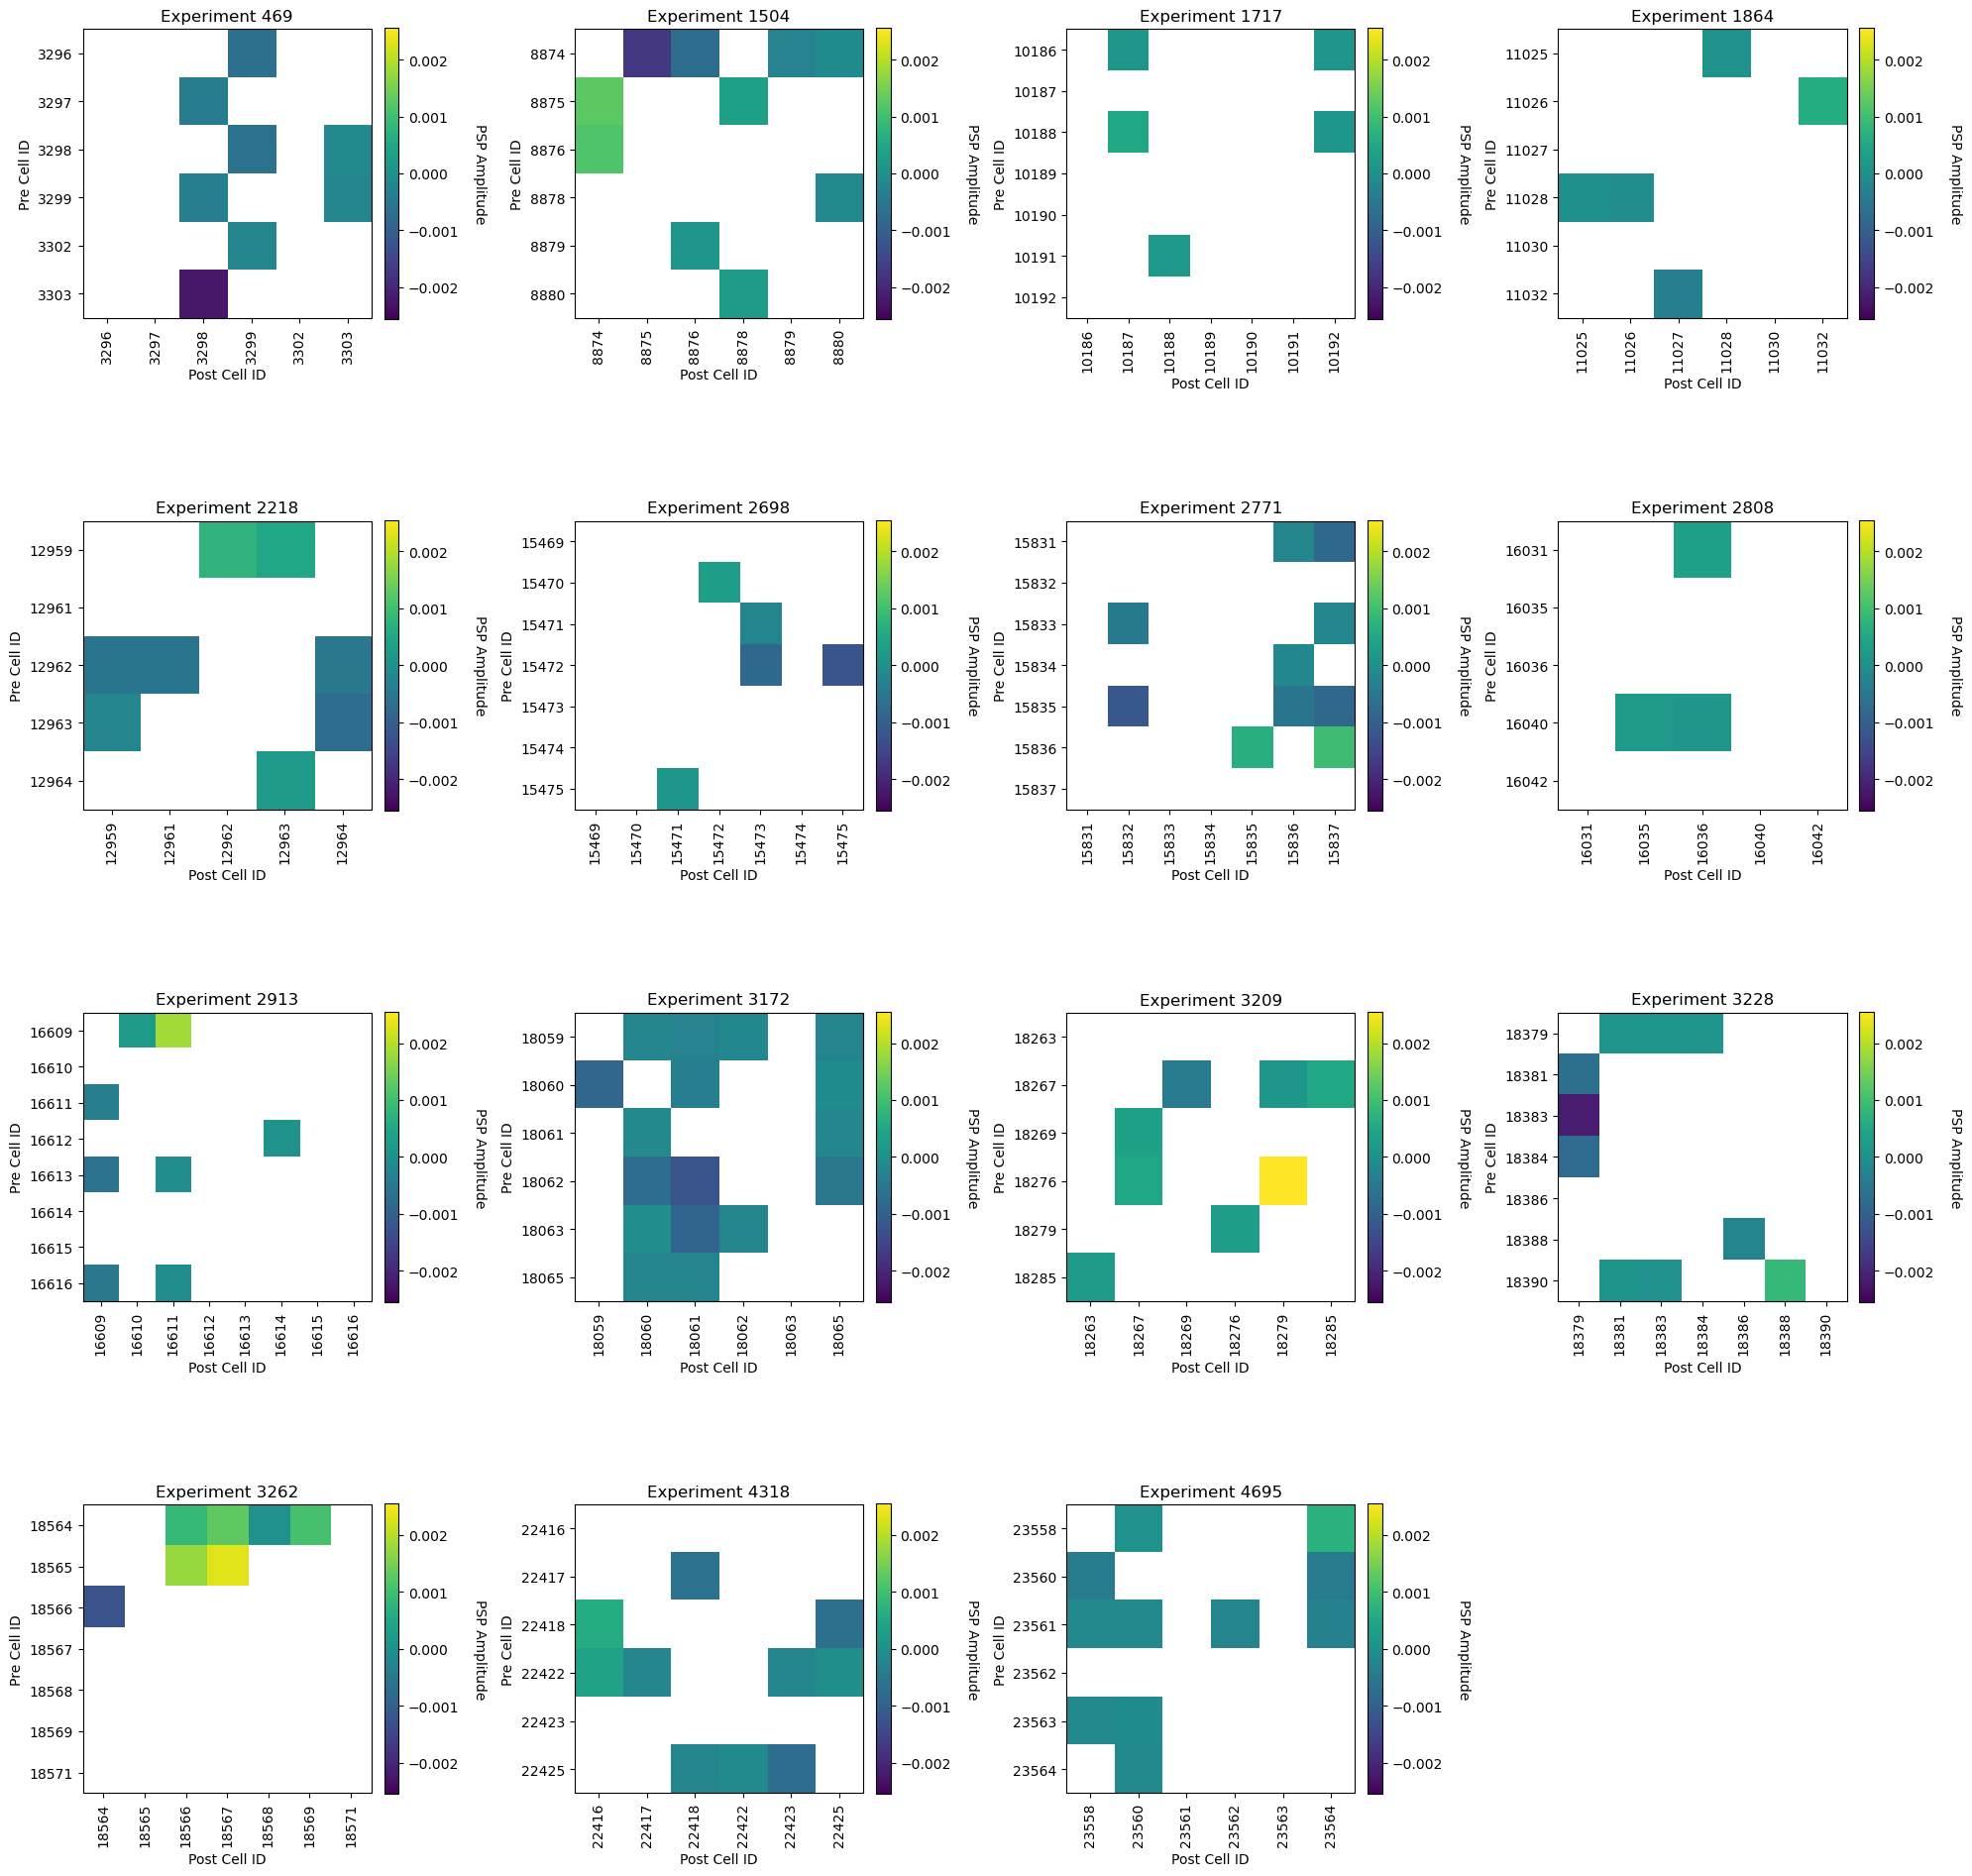

In [45]:
# List of considered experiments
considered_experiments = []

# Loop through all experiments and add to the list those with more than 10 data points
for experiment_id in df_result['experiment_id'].unique():
    df_experiment = df_result[df_result['experiment_id'] == experiment_id]
    
    if len(df_experiment) >= 10:
        considered_experiments.append(experiment_id)
        print(f'Experiment {experiment_id} has {len(df_experiment)} data points.')

# Number of subplots
n_experiments = len(considered_experiments)

# If there are no experiments, do nothing
if n_experiments == 0:
    print("No experiments with sufficient data were found.")
else:
    # Calculate rows and columns for subplots
    n_cols = int(np.ceil(np.sqrt(n_experiments)))  # Number of columns
    n_rows = int(np.ceil(n_experiments / n_cols))  # Number of rows
    
    # Determine figure size based on number of subplots
    fig = plt.figure(figsize=(5 * n_cols, 5 * n_rows))

    # Use gridspec to manage colorbar spacing
    gs = fig.add_gridspec(n_rows, n_cols, width_ratios=[1] * n_cols, height_ratios=[1] * n_rows)

    # Create subplot axes
    axes = [fig.add_subplot(gs[i // n_cols, i % n_cols]) for i in range(n_experiments)]
    
    # Determine maximum absolute PSP value for a common range across all subplots
    max_abs_psp = -np.inf
    for experiment_id in considered_experiments:
        df_experiment = df_result[df_result['experiment_id'] == experiment_id]
        all_cells = np.sort(pd.unique(df_experiment[['pre_cell_id', 'post_cell_id']].values.ravel()))
        df_psp_matrix = pd.DataFrame(np.nan, index=all_cells, columns=all_cells)

        for _, row in df_experiment.iterrows():
            pre_cell = row['pre_cell_id']
            post_cell = row['post_cell_id']
            psp_value = row['psp_amplitude']
            df_psp_matrix.loc[pre_cell, post_cell] = psp_value

        psp_matrix_numpy = df_psp_matrix.values
        max_abs_psp = max(max_abs_psp, np.nanmax(np.abs(psp_matrix_numpy)))  # Update maximum value

    # Loop through each considered experiment
    for i, experiment_id in enumerate(considered_experiments):
        df_experiment = df_result[df_result['experiment_id'] == experiment_id]
        
        # Generate PSP matrix for the experiment
        all_cells = np.sort(pd.unique(df_experiment[['pre_cell_id', 'post_cell_id']].values.ravel()))
        df_psp_matrix = pd.DataFrame(np.nan, index=all_cells, columns=all_cells)

        for _, row in df_experiment.iterrows():
            pre_cell = row['pre_cell_id']
            post_cell = row['post_cell_id']
            psp_value = row['psp_amplitude']
            df_psp_matrix.loc[pre_cell, post_cell] = psp_value

        psp_matrix_numpy = df_psp_matrix.values

        # Create a mask for NaN values
        masked_psp_matrix = np.ma.masked_invalid(psp_matrix_numpy)

        # Plot PSP matrix in corresponding subplot
        im = axes[i].imshow(masked_psp_matrix, cmap='viridis', interpolation='none', vmin=-max_abs_psp, vmax=max_abs_psp)
        axes[i].set_title(f'Experiment {experiment_id}')
        
        # Set tick labels with pre_cell_id and post_cell_id values
        axes[i].set_xticks(np.arange(len(all_cells)))
        axes[i].set_yticks(np.arange(len(all_cells)))
        axes[i].set_xticklabels(all_cells, rotation=90)
        axes[i].set_yticklabels(all_cells)
        axes[i].set_xlabel('Post Cell ID')
        axes[i].set_ylabel('Pre Cell ID')

        # Create colorbar with same size as subplot
        cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
        
        # Rotate colorbar title 180 degrees
        cbar.set_label('PSP Amplitude', rotation=270, labelpad=20)

    # Remove empty axes if there are fewer experiments than subplots
    for j in range(n_experiments, len(axes)):
        axes[j].axis('off')


    # Adjust subplots
    plt.tight_layout()
    plt.savefig('psp_matrix.png')
    plt.show()



### Calculo motivos solo con datos 'hay' o 'no hay' sinapsis

In [46]:
from collections import Counter

def compute_motifs_from_table(df):
    """
    Calculates connectivity motifs from a synapse table with measured data.

    Parameters:
    - df: DataFrame with columns ['id_synapse', 'pre', 'post', 'measured'], where:
      - NaN: not measured
      - 0: measured and no synapse
      - 1: measured and synapse exists
    - neuron_types: dictionary {neuron_id: type}, where type is 'E' (excitatory) or 'I' (inhibitory).

    Returns:
    - motif_rec, motif_div, motif_con, motif_chn: correlation coefficients of the motifs.
    """
    # Filter only measured synapses (0 or 1)
    df = df.dropna(subset=['measured'])
    
    # Get existing connections (where measured == 1)
    connections = df[df['measured'] == 1][['pre', 'post']].values
    
    # If there are no recorded synapses, return 0
    if len(connections) == 0:
        return 0, 0, 0, 0

    # Total measured pairs
    total_measured = len(df)

    # Measured connection probability (p) = existing synapses / total measurements
    p_connect = len(connections) / total_measured

    # Variance of a Bernoulli variable (p*(1-p))
    sigma2 = p_connect * (1 - p_connect) if total_measured > 0 else 1

    # Create dictionary of measured connections
    connectivity = {(pre, post): 1 for pre, post in connections}

    # Motif counters
    rec_count = div_count = con_count = chn_count = 0
    total_triplets = 0

    for pre1, post1 in connections:
        for pre2, post2 in connections:
            if pre1 == pre2 and post1 == post2:  # Avoid self-comparisons
                continue

            # Reciprocal motif (A → B and B → A)
            if (post1, pre1) in connectivity:
                rec_count += 1

            # Divergent motif (A → B and A → C)
            if pre1 == pre2 and post1 != post2:
                div_count += 1

            # Convergent motif (A → C and B → C)
            if post1 == post2 and pre1 != pre2:
                con_count += 1

            # Chain motif (A → B → C)
            if post1 == pre2 and pre1 != post2:
                chn_count += 1

            total_triplets += 1

    # Motif probabilities
    p_rec = rec_count / total_measured if total_measured else 0
    p_div = div_count / total_triplets if total_triplets else 0
    p_con = con_count / total_triplets if total_triplets else 0
    p_chn = chn_count / total_triplets if total_triplets else 0

    # Normalization by variance
    motif_rec = (p_rec - p_connect ** 2) / sigma2 if sigma2 else 0
    motif_div = (p_div - p_connect ** 2) / sigma2 if sigma2 else 0
    motif_con = (p_con - p_connect ** 2) / sigma2 if sigma2 else 0
    motif_chn = (p_chn - p_connect ** 2) / sigma2 if sigma2 else 0

    return motif_rec, motif_div, motif_con, motif_chn


In [ ]:
# Filter experiments with more than 10 data points
experiment_counts = df_result['experiment_id'].value_counts()
valid_experiment_ids = experiment_counts[experiment_counts > 10].index
print('There are', len(valid_experiment_ids), 'experiments with more than 10 data points.')

# Load region information
df3 = pd.read_sql_query("SELECT * from " + str(table_list[3])[2:-3], con)
df2 = pd.read_sql_query("SELECT * from " + str(table_list[2])[2:-3], con)

# Dictionary to store results by experiment
motifs_results = {}

# Iterate over each valid experiment
for exp_id in valid_experiment_ids:
    # Get the experiment's region
    region = df3[df3['id'] == exp_id]['target_region'].values[0]
    species = df2[df2['id'] == exp_id]['species'].values
    print(f'Experiment {exp_id} was performed in {species} in region {region}.')

Hay 11 experimentos con más de 10 datos.
Experimento 3172 fue hecho en ['mouse'] en la región VisP.
Experimento 2698 fue hecho en ['mouse'] en la región TCx.
Experimento 2771 fue hecho en ['mouse'] en la región VisP.
Experimento 3228 fue hecho en ['mouse'] en la región VisP.
Experimento 469 fue hecho en ['mouse'] en la región VisP.
Experimento 2808 fue hecho en ['mouse'] en la región VisP.
Experimento 4695 fue hecho en [] en la región VisP.
Experimento 3262 fue hecho en ['mouse'] en la región VisP.
Experimento 1717 fue hecho en ['mouse'] en la región TCx.
Experimento 1864 fue hecho en ['human'] en la región VisP.
Experimento 1504 fue hecho en ['mouse'] en la región VisP.
